# PRCP-1004-Fifa20

## PTID-CDS-MAY-25-2723

## BUISNESS CASE: WITH THE FIFA20 DATASET WE NEED TO CLUSTER THE PLAYER BY THEIR SKILL INTO CERTAIN GROUP

### The attributes used in the project are:

- Name: Name of the player.
- Age: Age of the player.
- Height: Height of the player in inches (transformed to centimeters in preprocessing).
- Overall: General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on using their whole skillset.
- Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.
- PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.
- WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
- WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
- Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages.
- ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.
- RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.
- LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.
- CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.
- RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.
- LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.
- RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.
- LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.
- Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
- Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.
- HeadingAccuracy: Player’s accuracy to pass or shoot by using his head rated between 1-99.
- ShortPassing: Player’s accuracy for short passes rated between 1-99.
- LongPassing: Player’s accuracy for long passes rated between 1-99.
- Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.
- SprintSpeed: Speed rate of the player rated between 1-99.
- Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.
- FKAccuracy: Player’s accuracy to score free kick goals rated between 1-99.
- BallControl: Player’s ability to control the ball rated between 1-99.
- Balance: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.
- ShotPower: Player’s strength level of shooting the ball rated between 1-99.
- Jumping: Player’s jumping skill rated between 1-99.
- Penalties: Player’s accuracy to score goals from penalty rated between 1-99.
- Strength: Physical strength of the player rated between 1-99.
- Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99.
- Reactions: Acting speed of the player to what happens in his environment rated between 1-99.
- Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.
- Positioning: Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.
- Vision: Player’s mental awareness about the other players in the team for passing rated between 1-99.
- Volleys: Player’s ability to perform volleys rated between 1-99.
- LongShots: Player’s accuracy of shoots from long distances rated between 1-99.
- Stamina: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.
- Composure: Player’s ability to control his calmness and frustration during the match rated between 1-99.
- Curve: Player’s ability to curve the ball while passing or shooting rated between 1-99.
- Interceptions: Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.
- StandingTackle: Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.
- SlidingTackle: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
- Marking: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.

## Domain analysis:

### Importing Library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the dataset:

In [2]:
data = pd.read_csv('players_20.csv')
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

### Basic Checks:

In [3]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [4]:
data.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [5]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [6]:
columns = list(data.columns)
print(columns)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

- In this data 104 column available with unique column

In [7]:
data.shape

(18278, 104)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [9]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

## Exploratory Data Analysis:

### REMOVE THE SPECIAL CHARACTER AND SPLIT THE STRING
 - Because it will create issue during analysis

In [10]:
data = data.replace('[\#]','',regex=True)
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                     8  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2   

     lb   lcb    cb   rcb    rb  
0  63+2  52+2  52+2  52+2  63+2

In [11]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns: # for itertion of columns
    data[colmun] = data[colmun].str.split('+',expand=True)[0] # Split of string
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0                     8  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

- Univariate analysis has not been used because of more features involved in it.

## Bivariate analysis:

### Numeric Variable:
#### Age vs movement_reactions

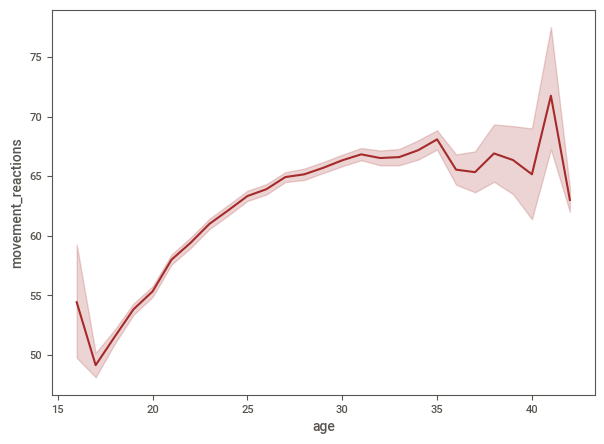

In [14]:
plt.figure(figsize=(7,5))
sns.lineplot(x='age',y='movement_reactions',data=data,color='brown')
plt.show()

- At the age of 15 to 20 movement reactions is less.
- If player age is increasing player movement reaction also increasing.

#### Height vs Weight

<Figure size 500x700 with 0 Axes>

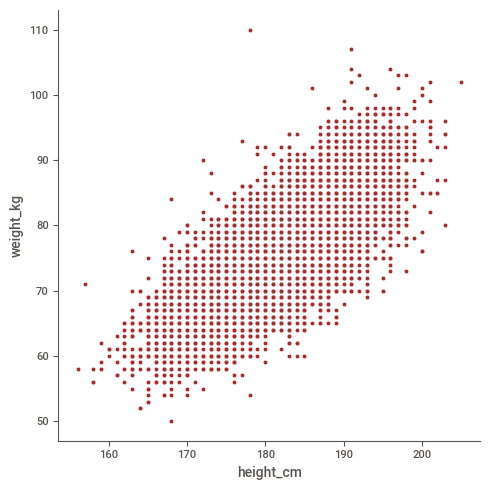

In [15]:
plt.figure(figsize=(5,7))
sns.relplot(x='height_cm',y='weight_kg',data=data,color='brown')
plt.show()

#### Relation Between overall and potential with respect to preferred foot:

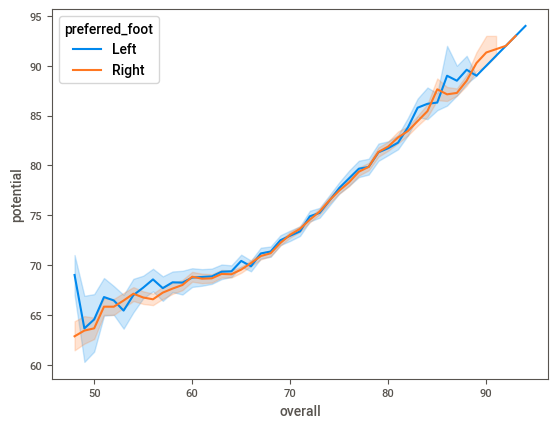

In [16]:
sns.lineplot(x='overall',y='potential',data=data,color='brown',hue='preferred_foot')
plt.show()

#### Relation Between Value eur and Wage eur with respect to Preferred foot:

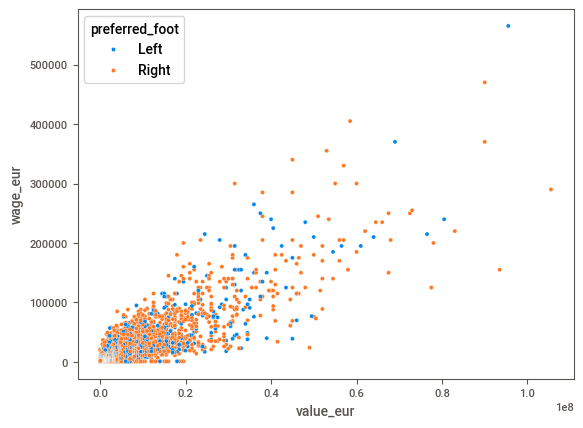

In [17]:
sns.scatterplot(x='value_eur',y='wage_eur',data=data,color='brown',hue='preferred_foot')
plt.show()

#### Contact valid until vs release clause eur

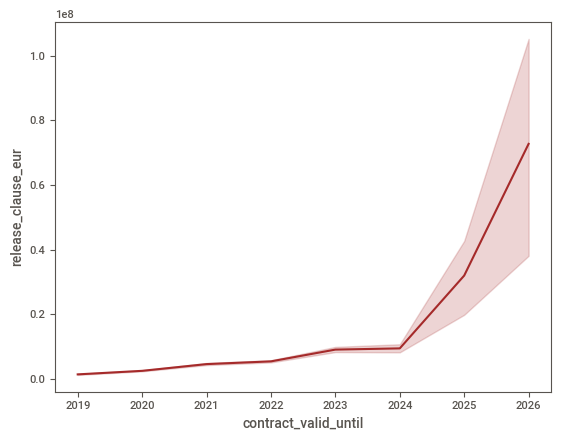

In [18]:
sns.lineplot(x='contract_valid_until',y='release_clause_eur',data=data,color='brown')
plt.show()

#### Relation between pace and shooting with respect to preferred foot:

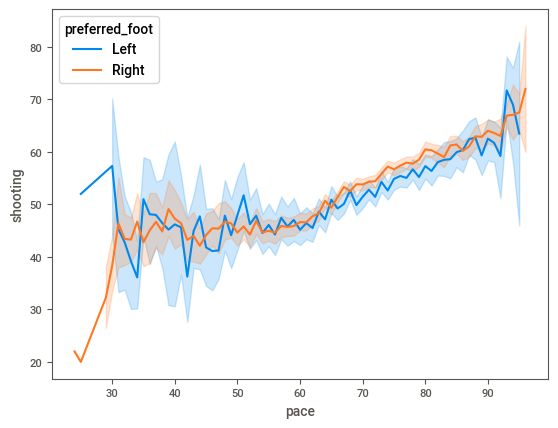

In [19]:
sns.lineplot(x='pace',y='shooting',data=data,color='brown',hue='preferred_foot')
plt.show()

#### Dribbling vs defending

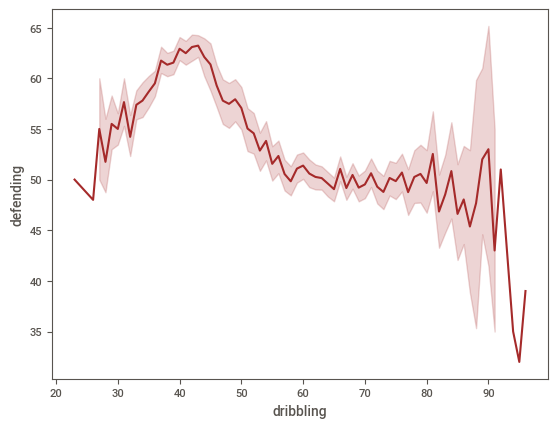

In [20]:
sns.lineplot(x='dribbling',y='defending',data=data,color='brown')
plt.show()

#### Physic vs attacking crossing

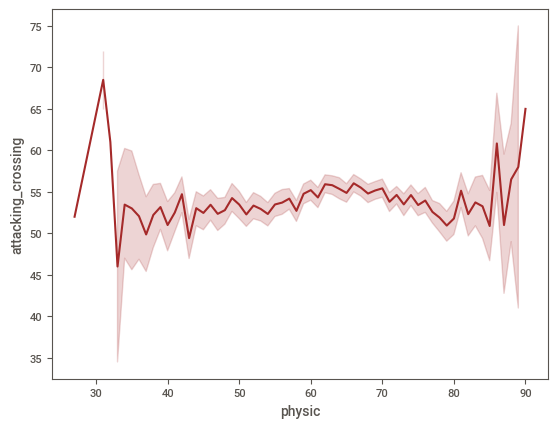

In [21]:
sns.lineplot(x='physic',y='attacking_crossing',data=data,color='brown')
plt.show()

#### gk_diving vs dk_handling

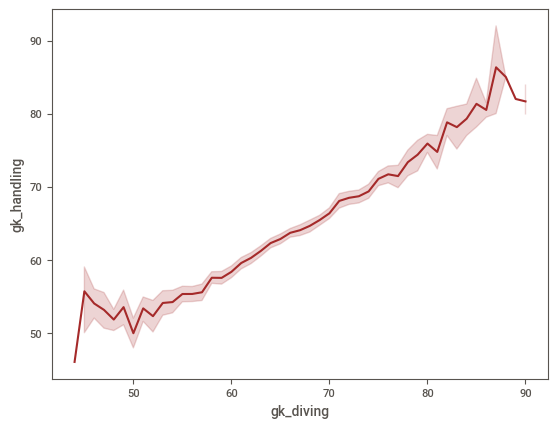

In [22]:
sns.lineplot(x='gk_diving',y='gk_handling',data=data,color='brown')
plt.show()

#### gk_reflexes vs gk_speed

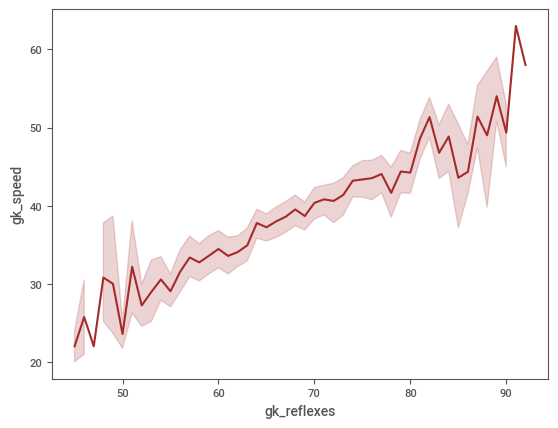

In [23]:
sns.lineplot(x='gk_reflexes',y='gk_speed',data=data,color='brown')
plt.show()

#### gk_positioning vs gk_kicking

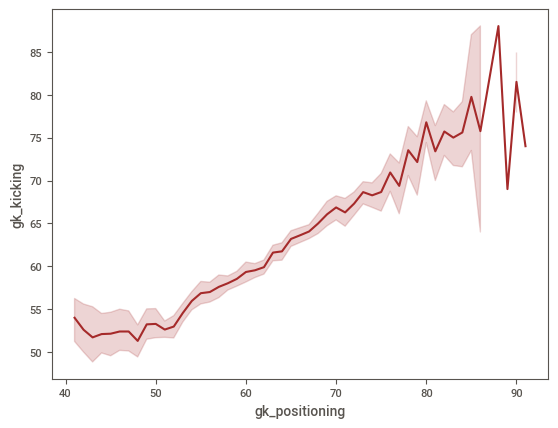

In [24]:
sns.lineplot(x='gk_positioning',y='gk_kicking',data=data,color='brown')
plt.show()

#### Attacking crossing vs Attacking finishing

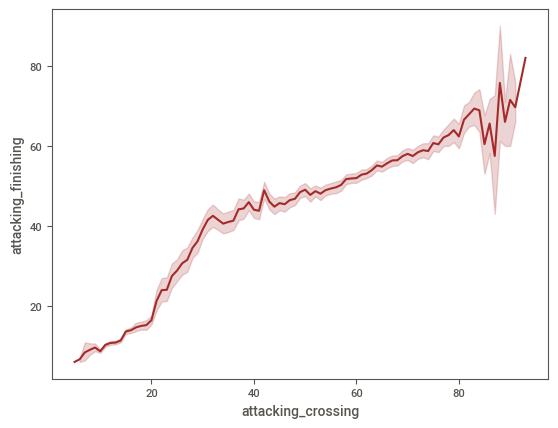

In [25]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=data,color='brown')
plt.show()

## Categorical variable:

### International reputation vs weak foot:

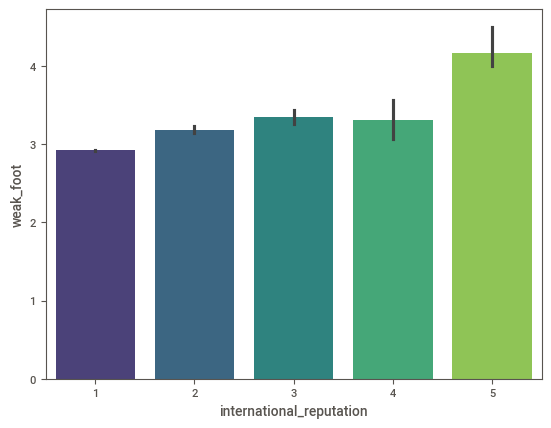

In [26]:
sns.barplot(x='international_reputation',y='weak_foot',data=data,palette='viridis')
plt.show()

- 5 Intrenational reputation rating of player has more than 4 week foot
- 1 international reputation rating player has less than 3 weak foot
- 2, 3, 4 international reputation player has constant weak foot

### Work rate vs skill moves

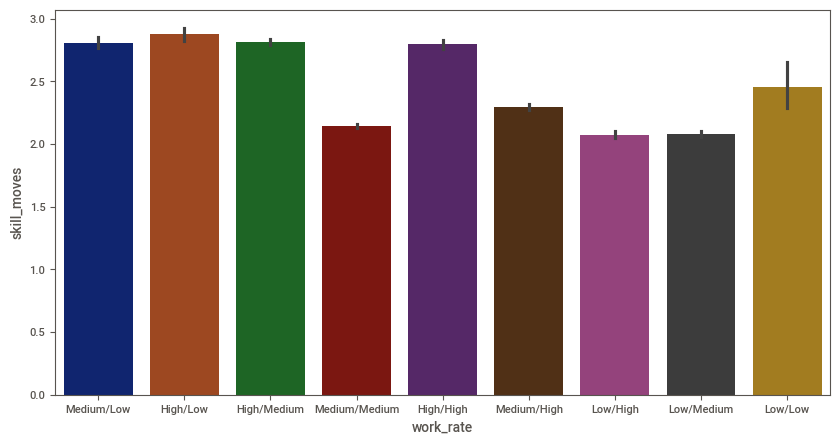

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='work_rate',y='skill_moves',data=data,palette='dark')
plt.show()

- In this plot cleary seen that 4 types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
- Other work rate skill moves is less than 2.5

### Real face vs release clause eur:

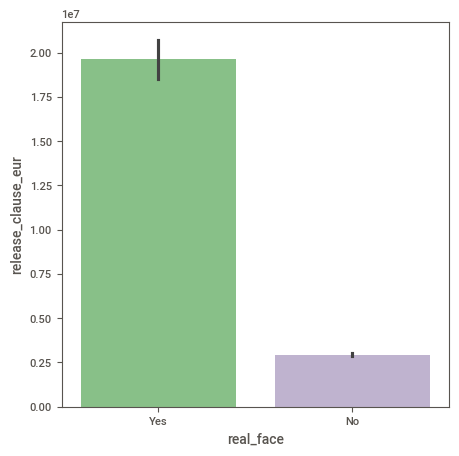

In [28]:
plt.figure(figsize=(5,5))
sns.barplot(x='real_face',y='release_clause_eur',data=data,palette='Accent')
plt.show()

- If the player face is real then the release clause is more.
- If the player face is not real then the release clause is less

### preferred foot vs pace:

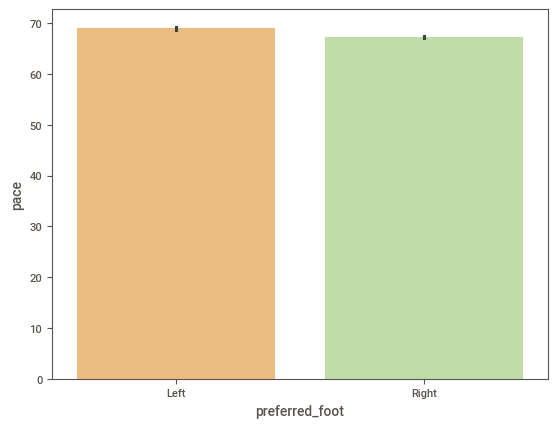

In [29]:
sns.barplot(x='preferred_foot',y='pace',data=data,palette='Spectral')
plt.show()

### Team position vs Team shooting:

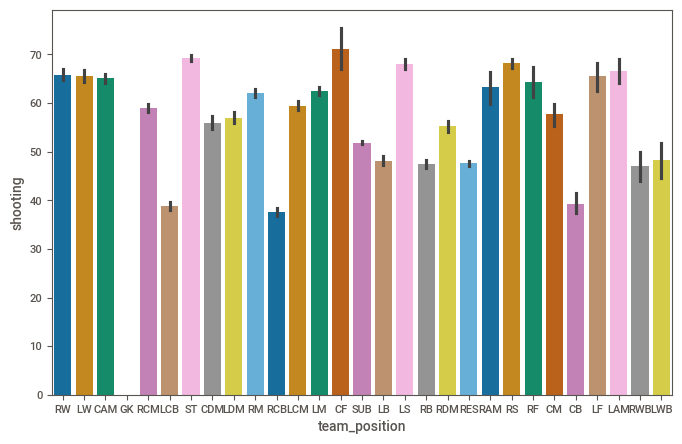

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='team_position',y='shooting',data=data,palette='colorblind')
plt.show()

- In this plot we clearly see that GK team position has no shooting score.
- CF team position has maximum shooting score.

## Here some Condition and Plotting:

### Top 10 Nationality player:

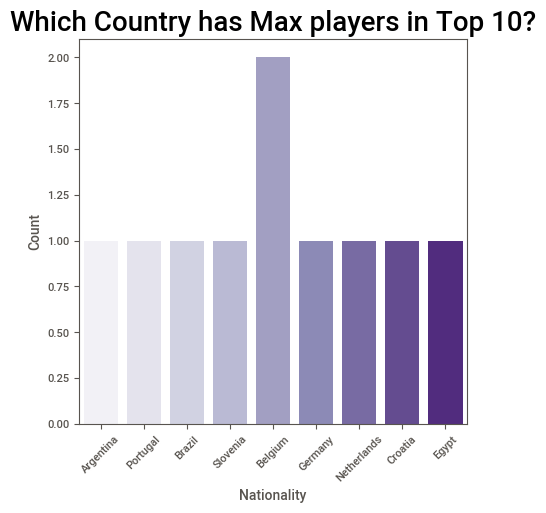

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x='nationality',data=data.head(10),palette='Purples')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Country has Max players in Top 10?',fontsize = 20)
plt.show()

- Most of the belgium country player in to 10

## Top 10 Club Player:

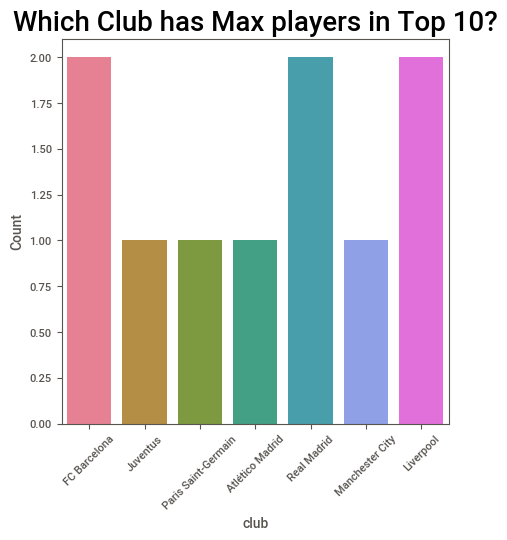

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(x='club',data=data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Club has Max players in Top 10?',fontsize = 20)
plt.show()

- Most of the Fc Barcelona. real madrid, and liver pool club player in top 10.

## Team position in top 10:

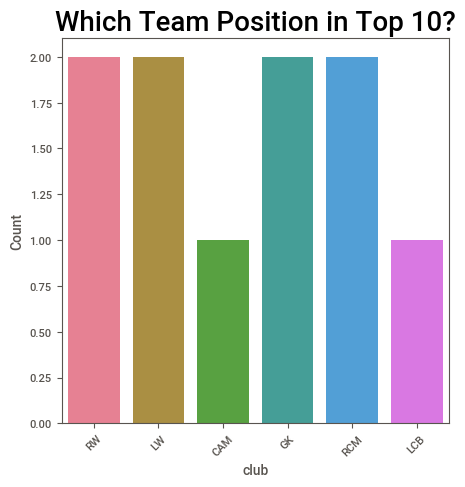

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='team_position',data=data.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation=45) # used to tild the name on x axis
plt.title('Which Team Position in Top 10?',fontsize = 20)
plt.show()

- RW, LW, GK, RCM team position in top 10 except CAM, LCB

### Comparing Messi Vs Ronaldo:

In [34]:
feature = data[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head(2)
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0

### Top 5 Maximum Player with minimum release:

In [35]:
data.sort_values(by=['value_eur','release_clause_eur'],ascending=[0,1]).head()

sofifa_id                                         player_url  \
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   

      short_name                       long_name  age         dob  height_cm  \
2      Neymar Jr   Neymar da Silva Santos Junior   27  1992-02-05        175   
0       L. Messi  Lionel Andrés Messi Cuccittini   32  1987-06-24        170   
10     K. Mbappé                   Kylian Mbappé   20  1998-12-20        178   
5   K. De Bruyne                 Kevin De Bruyne   28  1991-06-28        181   
4      E. Hazard                     Eden Hazard   28  1991-01-07        175   

    weight_kg nationality                 club  overall  potential  value_eur  \
2          68      Brazil  Paris Saint-Germain       92         92  105500000   
0          72   Argentina         FC Barcelona       94         94   95500000   
10         73      France  Paris Saint-Germain       89         95   93500000   
5          70     Belgium      Manchester City       91         91   90000000   
4          74     Belgium          Real Madrid       91         91   90000000   

    wage_eur player_positions preferred_foot  international_reputation  \
2     290000          LW, CAM          Right                         5   
0     565000       RW, CF, ST           Left                         5   
10    155000           ST, RW          Right                         3   
5     370000          CAM, CM          Right                         4   
4     470000           LW, CF          Right                         4   

    weak_foot  skill_moves    work_rate body_type real_face  \
2           5            5  High/Medium    Neymar       Yes   
0           4            4   Medium/Low     Messi       Yes   
10          4            5     High/Low    Normal       Yes   
5           5            4    High/High    Normal       Yes   
4           4            4  High/Medium    Normal       Yes   

    release_clause_eur                                        player_tags  \
2          195200000.0  Speedster, Dribbler, Playmaker  , Crosser, FK ...   
0          195800000.0  Dribbler, Distance Shooter, Crosser, FK Specia...   
10         191700000.0                       Speedster, Dribbler, Acrobat   
5          166500000.0  Dribbler, Playmaker  , Engine, Distance Shoote...   
4          184500000.0                       Speedster, Dribbler, Acrobat   

   team_position  team_jersey_number loaned_from      joined  \
2            CAM                10.0         NaN  2017-08-03   
0             RW                10.0         NaN  2004-07-01   
10            RW                 7.0         NaN  2018-07-01   
5            RCM                17.0         NaN  2015-08-30   
4             LW                 7.0         NaN  2019-07-01   

    contract_valid_until nation_position  nation_jersey_number  pace  \
2                 2022.0              LW                  10.0  91.0   
0                 2021.0             NaN                   NaN  87.0   
10                2022.0              RM                  10.0  96.0   
5                 2023.0             RCM                   7.0  76.0   
4                 2024.0              LF                  10.0  91.0   

    shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
2       85.0     87.0       95.0       32.0    58.0        NaN          NaN   
0       92.0     92.0       96.0       39.0    66.0        NaN          NaN   
10      84.0     78.0       90.0       39.0    75.0        NaN          NaN   
5       86.0     92.0       86.0       61.0    78.0        NaN          NaN   
4       83.0     86.0       94.0       35.0    66.0        NaN          NaN   

    gk_kicking  gk_reflexes  gk_speed  gk_posit

## Data preprocessing:

In [36]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

### Checking the distribution before impute missing values:

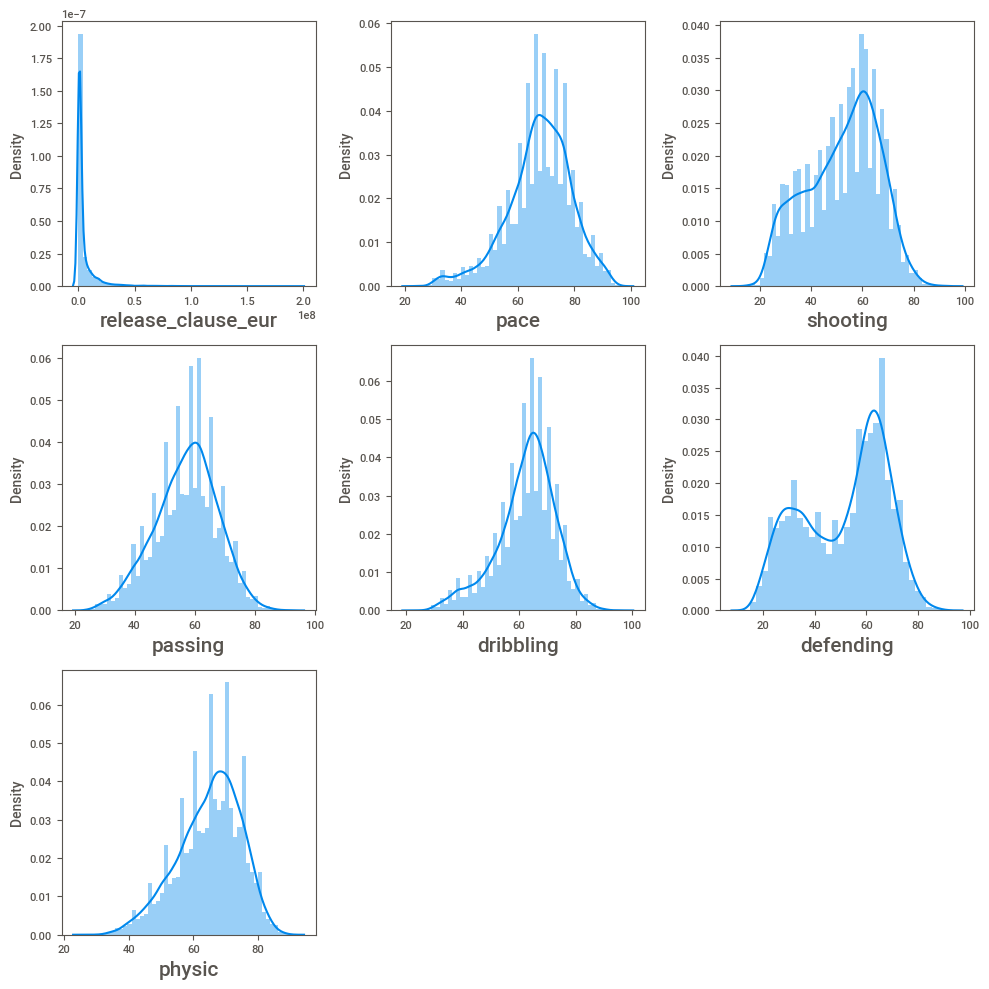

In [37]:
dist = data[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(10,10)) 
plotnumber = 1 

for column in dist:  
    if plotnumber<=8:    
        plt.subplot(3,3,plotnumber) 
        sns.distplot(x=dist[column]) 
        plt.xlabel(column,fontsize=15)  
    plotnumber+=1 
plt.tight_layout()
plt.show() 

- Impute missing value using median because distribution is not normal

In [38]:
data.loc[data['release_clause_eur'].isnull()==True,'release_clause_eur']=data['release_clause_eur'].median()
data.loc[data['pace'].isnull()==True,'pace']=data['pace'].median()
data.loc[data['shooting'].isnull()==True,'shooting']=data['shooting'].median()
data.loc[data['passing'].isnull()==True,'passing']=data['passing'].median()
data.loc[data['dribbling'].isnull()==True,'dribbling']=data['dribbling'].median()
data.loc[data['defending'].isnull()==True,'defending']=data['defending'].median()
data.loc[data['physic'].isnull()==True,'physic']=data['physic'].median()

In [39]:
# checking missing values after imputation
print('release_clause_eur:',data['release_clause_eur'].isnull().sum())
print('pace:',data['pace'].isnull().sum())
print('shooting:',data['shooting'].isnull().sum())
print('passing:',data['passing'].isnull().sum())
print('dribbling:',data['dribbling'].isnull().sum())
print('defending:',data['defending'].isnull().sum())
print('physic:',data['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


### Categorical

In [40]:
# Get the value counts:
data.team_position.value_counts().head()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: count, dtype: int64

In [41]:
# impute categorical data using mode
data['team_position'] = data['team_position'].fillna('SUB')
data['team_position'] = data['team_position'].fillna('RES')
data['team_position'] = data['team_position'].fillna('GK')
data['team_position'] = data['team_position'].fillna('RCB')
data['team_position'] = data['team_position'].fillna('LCB')

In [42]:
# checking missing values after imputing 
data['team_position'].isnull().sum()

0

### Handling Categorical Data:

- In this data only preferred foot and team position feature is impoertant and remaining all feature is unique.

#### Preferred foot:

In [43]:
data.preferred_foot.value_counts()

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64

- Right is assign with 1 because of majority and most freqent
- Left is assign with 0 because of less no

#### Label encoding

In [44]:
data.preferred_foot = data.preferred_foot.map({'Right':1,'Left':0})

#### Team position:

In [45]:
data.team_position.value_counts()

team_position
SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [46]:
# Use mannual encoding because lots of labels available
data.team_position = data.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [47]:
data.team_position.unique()

array([ 9, 10, 16, 26, 20, 24, 21, 11, 14, 18, 25, 19, 17,  0, 28, 22, 12,
       23, 15, 27,  4, 13,  2,  7,  8,  1,  3,  6,  5], dtype=int64)

## Checking Outliers:

- In this data we are handle only important feature outlier, because the remaining feature is unique or some feature is not reuired to handle outlier

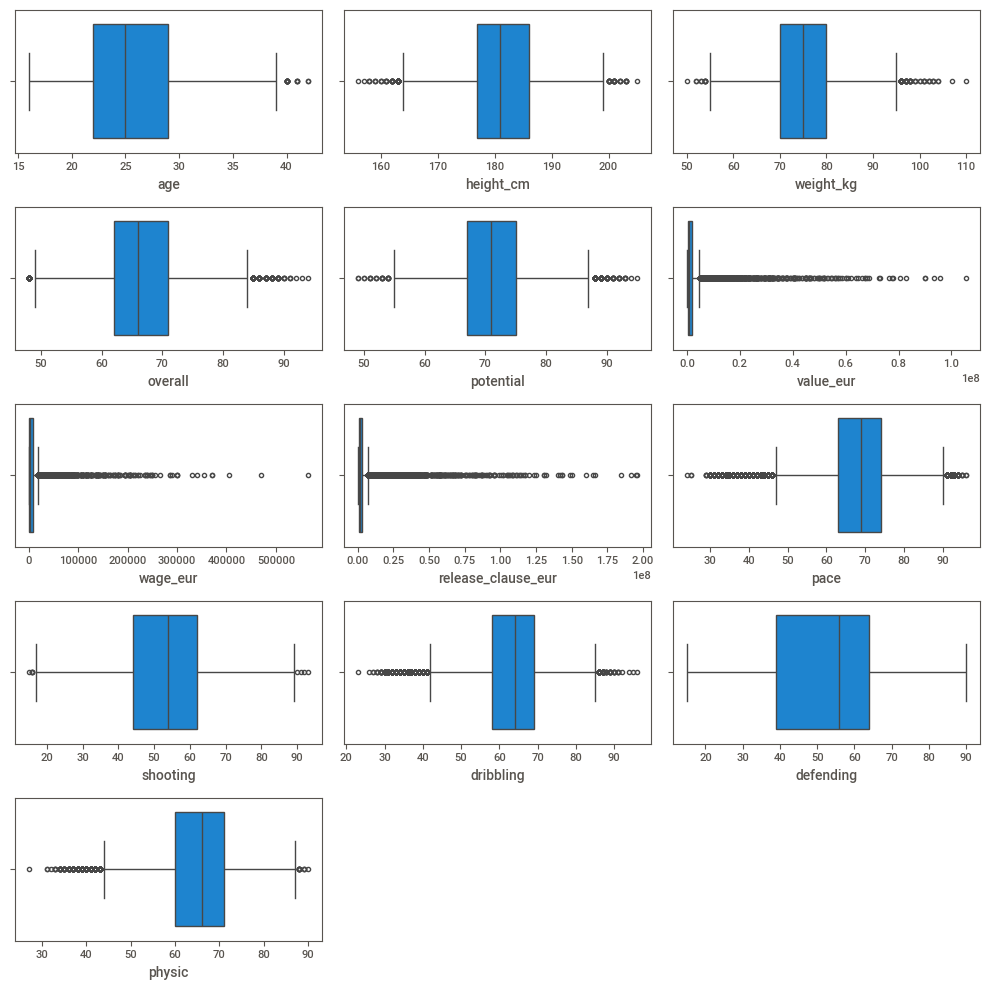

In [48]:
out = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]


plt.figure(figsize=(10,10)) 
plotnumber = 1 

for column in out: 
    if plotnumber<=16:    
        plt.subplot(5,3,plotnumber) 
        sns.boxplot(x=out[column]) 
        plt.xlabel(column,fontsize=10)  
    plotnumber+=1
plt.tight_layout()
plt.show() 

#### checking the distribution before handling the outliers:

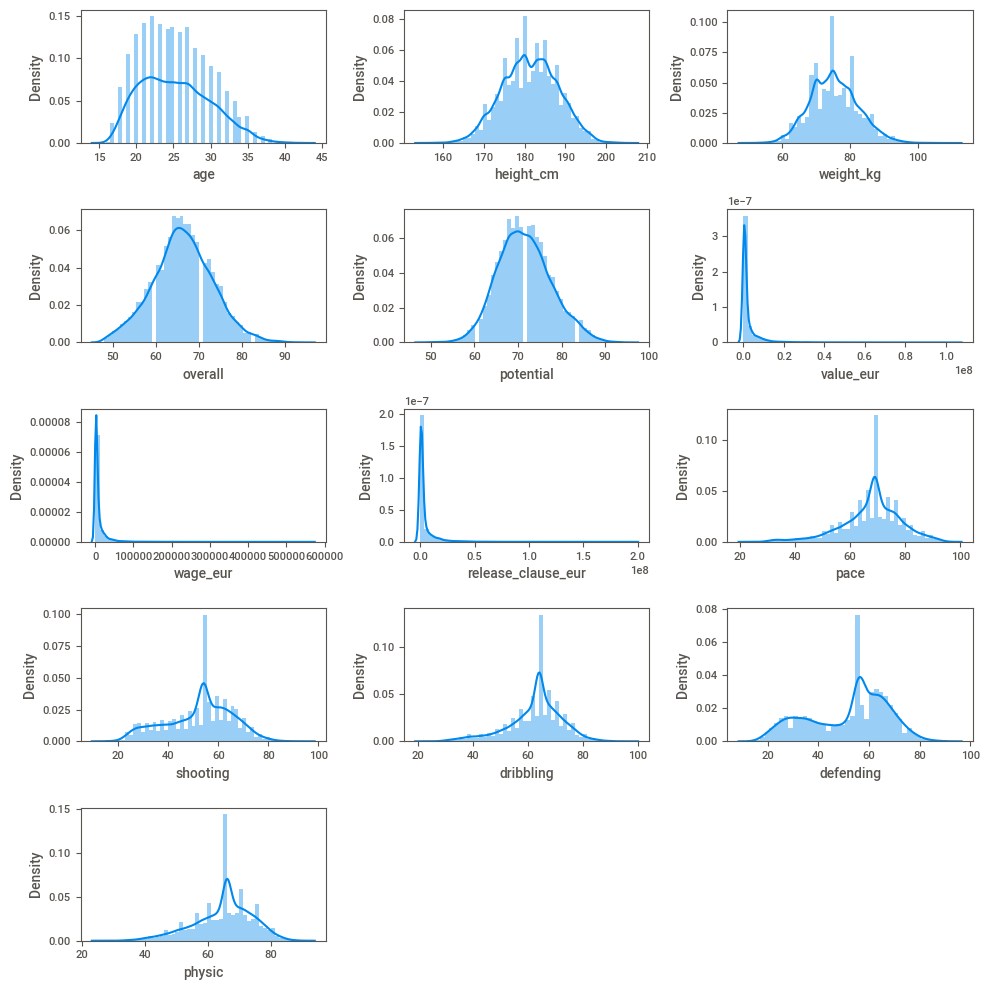

In [49]:
dist1 = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(10,10)) 
plotnumber = 1 
for column in dist1: 
    if plotnumber<=15:    
        plt.subplot(5,3,plotnumber) 
        sns.distplot(x=out[column])  
        plt.xlabel(column,fontsize=10)  
    plotnumber+=1 
plt.tight_layout()
plt.show() 

- Here age,height_cm,weight_kg,overall,potential is follow a normal distribution so we are using empherical rule and for remaining feature we are using IQR method.

## Empherical rule or 3 standard deviation rule to detect the outlier

#### 1.AGE:

In [50]:
upper_bound = data['age'].mean() + 3 * data['age'].std()
print("upper_bound:",upper_bound)
lower_bound = data['age'].mean() - 3 * data['age'].std()
print("lower_bound:",lower_bound)

upper_bound: 39.254184882020766
lower_bound: 11.312397895088328


In [51]:
# Getting the percentage of the outlier
len(data.loc[data['age'] > upper_bound]) / len(data) * 100

0.10395010395010396

In [52]:
data.loc[data['age'] > upper_bound,'age']=data['age'].mean()

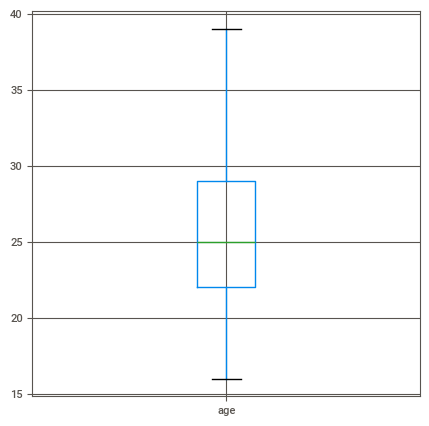

In [53]:
plt.figure(figsize=(5,5))
data.boxplot('age')
plt.show()

- Outliers imputed successfully.

### 2.Height Cm:

In [54]:
upper_bound = data['height_cm'].mean() + 3 * data['height_cm'].std()
print("upper_bound:",upper_bound)
lower_bound = data['height_cm'].mean() - 3 * data['height_cm'].std()
print("lower_bound:",lower_bound)

upper_bound: 201.63306813749588
lower_bound: 161.09129995529324


In [55]:
# Getting the percentage of the outlier
len(data.loc[data['height_cm'] > upper_bound]) / len(data) * 100

0.06018163912900754

In [56]:
data.loc[data['height_cm'] > upper_bound,'height_cm']=data['height_cm'].mean()
data.loc[data['height_cm'] < lower_bound,'height_cm']=data['height_cm'].mean()

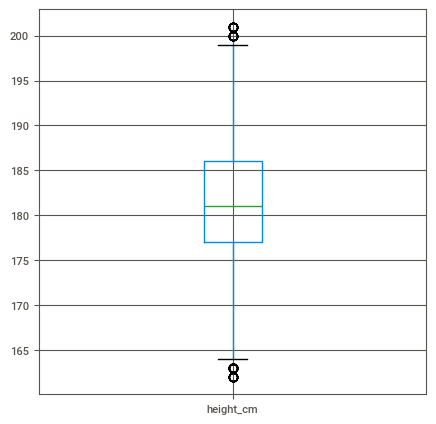

In [57]:
plt.figure(figsize=(5,5))
data.boxplot('height_cm')
plt.show()

- Outlier is imputed but it shows outliers

### 3.Weight kg:

In [58]:
upper_bound = data['weight_kg'].mean() + 3 * data['weight_kg'].std()
print("upper_bound:",upper_bound)
lower_bound = data['weight_kg'].mean() - 3 * data['weight_kg'].std()
print("lower_bound:",lower_bound)

upper_bound: 96.4195738558301
lower_bound: 54.133112433698294


In [59]:
# Getting the percentage of the outlier
len(data.loc[data['weight_kg'] > upper_bound]) / len(data) * 100

0.22431338220811906

In [60]:
len(data.loc[data['weight_kg'] < lower_bound]) / len(data) * 100

0.06018163912900754

In [61]:
# impute outlier
data.loc[data['weight_kg'] > upper_bound,'weight_kg']=data['weight_kg'].mean()
data.loc[data['weight_kg'] < lower_bound,'weight_kg']=data['weight_kg'].mean()

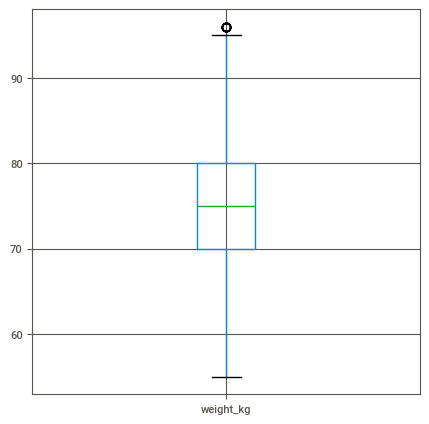

In [62]:
plt.figure(figsize=(5,5))
data.boxplot('weight_kg')
plt.show()

### 4.Overall:

In [63]:
upper_bound = data['overall'].mean() + 3 * data['overall'].std()
print("upper_bound:",upper_bound)
lower_bound = data['overall'].mean() - 3 * data['overall'].std()
print("lower_bound:",lower_bound)

upper_bound: 87.09485374672596
lower_bound: 45.39513421694621


In [64]:
data.loc[data['overall'] > upper_bound]

sofifa_id                                         player_url  \
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
1       20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
3      200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6      192448  https://sofifa.com/player/192448/marc-andre-te...   
7      203376  https://sofifa.com/player/203376/virgil-van-di...   
8      177003  https://sofifa.com/player/177003/luka-modric/2...   
9      209331  https://sofifa.com/player/209331/mohamed-salah...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   
11     201024  https://sofifa.com/player/201024/kalidou-kouli...   
12     202126  https://sofifa.com/player/202126/harry-kane/20...   
13     212831  https://sofifa.com/player/212831/alisson-ramse...   
14     193080  https://sofifa.com/player/193080/david-de-gea-...   
15     215914  https://sofifa.com/player/215914/ngolo-kante/2...   
16     138956  https://sofifa.com/player/138956/giorgio-chiel...   
17     153079  https://sofifa.com/player/153079/sergio-aguero...   
18     155862  https://sofifa.com/player/155862/sergio-ramos-...   
19     176580  https://sofifa.com/player/176580/luis-suarez/2...   
20     188545  https://sofifa.com/player/188545/robert-lewand...   
21     189511  https://sofifa.com/player/189511/sergio-busque...   
22     194765  https://sofifa.com/player/194765/antoine-griez...   
23     211110  https://sofifa.com/player/211110/paulo-dybala/...   
24     195864  https://sofifa.com/player/195864/paul-pogba/20...   
25     210257  https://sofifa.com/player/210257/ederson-santa...   
26     202652  https://sofifa.com/player/202652/raheem-sterli...   
27     190460  https://sofifa.com/player/190460/christian-eri...   
28     192119  https://sofifa.com/player/192119/thibaut-court...   
29     152729  https://sofifa.com/player/152729/gerard-pique-...   
30     162835  https://sofifa.com/player/162835/samir-handano...   
31     167495  https://sofifa.com/player/167495/manuel-neuer/...   
32     167948  https://sofifa.com/player/167948/hugo-lloris/2...   
33     168542  https://sofifa.com/player/168542/david-josue-j...   
34     179813  https://sofifa.com/player/179813/edinson-cavan...   
35     182493  https://sofifa.com/player/182493/diego-godin/2...   
36     182521  https://sofifa.com/player/182521/toni-kroos/20...   
37     188350  https://sofifa.com/player/188350/marco-reus/20...   
38     188567  https://sofifa.com/player/188567/pierre-emeric...   
39     208722  https://sofifa.com/player/208722/sadio-mane/20...   

           short_name                            long_name   age         dob  \
0            L. Messi       Lionel Andrés Messi Cuccittini  32.0  1987-06-24   
1   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro  34.0  1985-02-05   
2           Neymar Jr        Neymar da Silva Santos Junior  27.0  1992-02-05   
3            J. Oblak                            Jan Oblak  26.0  1993-01-07   
4           E. Hazard                          Eden Hazard  28.0  1991-01-07   
5        K. De Bruyne                      Kevin De Bruyne  28.0  1991-06-28   
6       M. ter Stegen                Marc-André ter Stegen  27.0  1992-04-30   
7         V. van Dijk                      Virgil van Dijk  27.0  1991-07-08   
8           L. Modrić                          Luka Modrić  33.0  1985-09-09   
9            M. Salah                 Mohamed  Salah Ghaly  27.0  1992-06-15   
10          K. Mbappé                        Kylian Mbappé  20.0  1998-12-20   
11       K. Koulibaly                    Kalidou Koulibaly  28.0  1991-06-20   
12            H. Kane                           Harry Kane  25.0  1993-07-28   
13            Alisson                Alisson Ramses Becker  26.0  1992-10-02   
14             

In [65]:
data.loc[data['overall'] < lower_bound]

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

- No outlier in lower bound

In [66]:
# Get the percentage of outlier
len(data.loc[data['overall'] > upper_bound])/18278*100

0.218842324105482

In [67]:
# Get the percentage of outlier
len(data.loc[data['overall'] < lower_bound])/18278*100

0.0

In [68]:
# impute outlier
data.loc[data['overall'] > upper_bound,'overall']=data['overall'].mean()

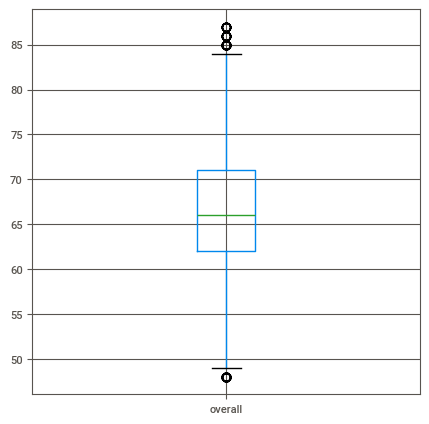

In [69]:
plt.figure(figsize=(5,5))
data.boxplot('overall')
plt.show()

### 5.Potential:

In [70]:
upper_bound = data['potential'].mean() + 3 * data['potential'].std()
print("upper_bound:",upper_bound)
lower_bound = data['potential'].mean() - 3 * data['potential'].std()
print("lower_bound:",lower_bound)

upper_bound: 89.96589419280832
lower_bound: 53.12787974307087


In [71]:
# Getting the percentage of the outlier
# Upper bound

len(data.loc[data['potential'] > upper_bound]) / len(data) * 100

0.21337126600284498

In [72]:
# lower bound

len(data.loc[data['potential'] < lower_bound]) / len(data) * 100

0.09300798774482985

In [73]:
# impute outlier
data.loc[data['potential'] > upper_bound,'potential']=data['potential'].mean()
data.loc[data['potential'] < lower_bound,'potential']=data['potential'].mean()

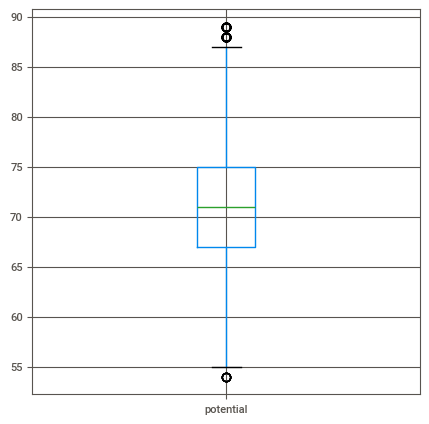

In [74]:
plt.figure(figsize=(5,5))
data.boxplot('potential')
plt.show()

## Using IQR method for Skewed data:

#### 1.Value EUR:

In [75]:
Q1 = data['value_eur'].quantile(0.25)
Q3 = data['value_eur'].quantile(0.75)
IQR = Q3 - Q1
lb_eur = Q1 - 1.5 * IQR
ub_eur = Q3 + 1.5 * IQR

In [76]:
lb_eur

-2337500.0

In [77]:
ub_eur

4762500.0

In [78]:
IQR

1775000.0

In [79]:
# get the percentage
len(data.loc[data['value_eur'] > ub_eur])/18278*100

13.737826895721634

- Here outlier is more than 5% so we not impute the outlier

### 2.Wage EUR:

In [80]:
Q1 = data['wage_eur'].quantile(0.25)
Q3 = data['wage_eur'].quantile(0.75)
IQR = Q3 - Q1
lb_wage = Q1 - 1.5 * IQR
ub_wage = Q3 + 1.5 * IQR

In [81]:
lb_wage

-9500.0

In [82]:
ub_wage

18500.0

In [83]:
IQR

7000.0

In [84]:
len(data.loc[data['wage_eur'] > ub_wage])/18278*100

12.911697122223437

- Here also outlier is more than 5% so we dont impute the outlier

### 3.Release clause eur:

In [85]:
Q1 = data['release_clause_eur'].quantile(0.25)
Q3 = data['release_clause_eur'].quantile(0.75)
IQR = Q3 - Q1
lb_Rele = Q1 - 1.5 * IQR
ub_Rele = Q3 + 1.5 * IQR

In [86]:
lb_Rele

-3310000.0

In [87]:
ub_Rele

7106000.0

In [88]:
IQR

2604000.0

In [89]:
len(data.loc[data['release_clause_eur'] > ub_Rele])/18278*100

15.368202210307475

- outlier is more than 5% so we dont impute the outlier

### 4.Pace:

In [90]:
Q1 = data['pace'].quantile(0.25)
Q3 = data['pace'].quantile(0.75)
IQR = Q3 - Q1
lb_pace = Q1 - 1.5 * IQR
ub_pace = Q3 + 1.5 * IQR

In [91]:
lb_pace

46.5

In [92]:
ub_pace

90.5

In [93]:
IQR

11.0

In [94]:
len(data.loc[data['pace'] > ub_pace])/18278*100

1.0285589232957655

In [95]:
len(data.loc[data['pace'] < lb_pace])/18278*100

4.19083050661998

- we have to handle the outliers cause outliers is less than 5%

In [96]:
# impute outlier both side
data.loc[data['pace'] < lb_pace,'pace'] = data['pace'].median()
data.loc[data['pace'] > ub_pace,'pace'] = data['pace'].median()

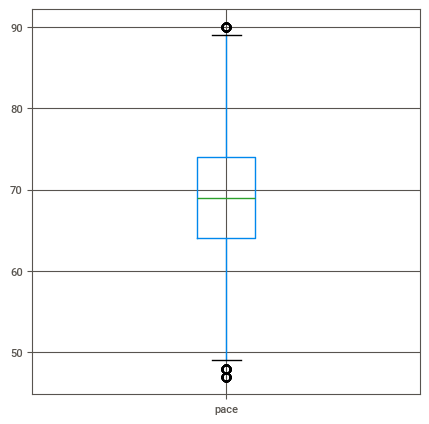

In [97]:
plt.figure(figsize=(5,5))
data.boxplot('pace')
plt.show()

- Outlier is impute successfully, but box plot is show outlier.

### 5.Shooting:

In [98]:
Q1 = data['shooting'].quantile(0.25)
Q3 = data['shooting'].quantile(0.75)
IQR = Q3 - Q1
lb_shoot = Q1 - 1.5 * IQR
ub_shoot = Q3 + 1.5 * IQR

In [99]:
lb_shoot

17.0

In [100]:
ub_shoot

89.0

In [101]:
IQR

18.0

In [102]:
len(data.loc[data['shooting'] > ub_shoot])/18278*100

0.0218842324105482

In [103]:
len(data.loc[data['shooting'] < lb_shoot])/18278*100

0.02735529051318525

- we have to handle the outliers cause outliers is less than 5%

In [104]:
# impute outlier both side
data.loc[data['shooting'] < lb_shoot,'shooting'] = data['shooting'].median()
data.loc[data['shooting'] > ub_shoot,'shooting'] = data['shooting'].median()

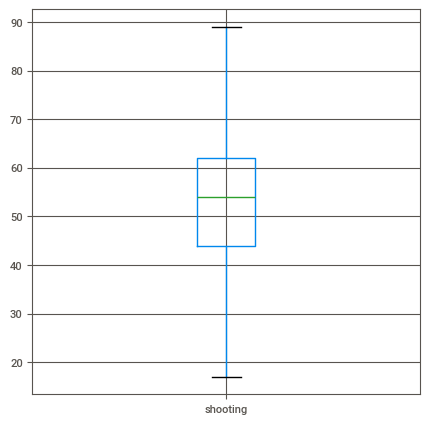

In [105]:
plt.figure(figsize=(5,5))
data.boxplot('shooting')
plt.show()

- Outlier is impute successfully.

### 6.Dribbling:

In [106]:
Q1 = data['dribbling'].quantile(0.25)
Q3 = data['dribbling'].quantile(0.75)
IQR = Q3 - Q1
lb_dribb = Q1 - 1.5 * IQR
ub_dribb = Q3 + 1.5 * IQR

In [107]:
lb_dribb

41.5

In [108]:
ub_dribb

85.5

In [109]:
IQR

11.0

In [110]:
len(data.loc[data['dribbling'] > ub_dribb])/18278*100

0.4048582995951417

In [111]:
len(data.loc[data['dribbling'] < lb_dribb])/18278*100

4.048582995951417

- we have to handle the outliers cause outliers is less than 5%

In [112]:
# impute outlier both side
data.loc[data['dribbling'] < lb_dribb,'dribbling'] = data['dribbling'].median()
data.loc[data['dribbling'] > ub_dribb,'dribbling'] = data['dribbling'].median()

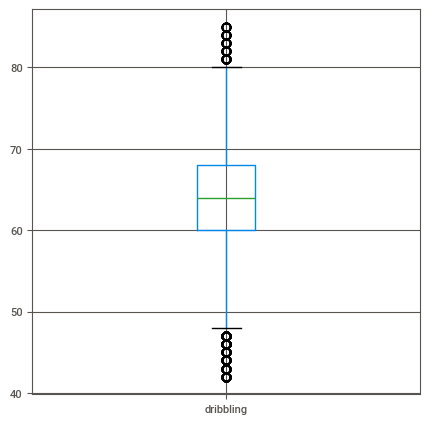

In [113]:
plt.figure(figsize=(5,5))
data.boxplot('dribbling')
plt.show()

- Outliers imputed successfully.

### 7.Physic:

In [114]:
Q1 = data['physic'].quantile(0.25)
Q3 = data['physic'].quantile(0.75)
IQR = Q3 - Q1
lb_phy = Q1 - 1.5 * IQR
ub_phy = Q3 + 1.5 * IQR

In [115]:
lb_phy

43.5

In [116]:
ub_phy

87.5

In [117]:
IQR

11.0

In [118]:
# percentage
len(data.loc[data['physic'] > ub_phy])/18278*100

0.0656526972316446

In [119]:
len(data.loc[data['physic'] < lb_phy])/18278*100

2.303315461210198

- we have to handle the outliers cause outliers is less than 5%

In [120]:
# impute outlier both side
data.loc[data['physic'] < lb_phy,'physic'] = data['physic'].median()
data.loc[data['physic'] > ub_phy,'physic'] = data['physic'].median()

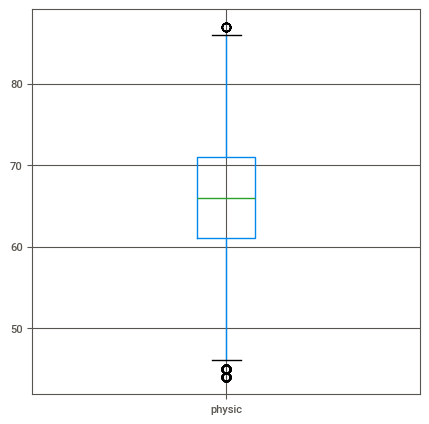

In [121]:
plt.figure(figsize=(5,5))
data.boxplot('physic')
plt.show()

- Outlier is impute successfull, but boxplot is showing the outlier.

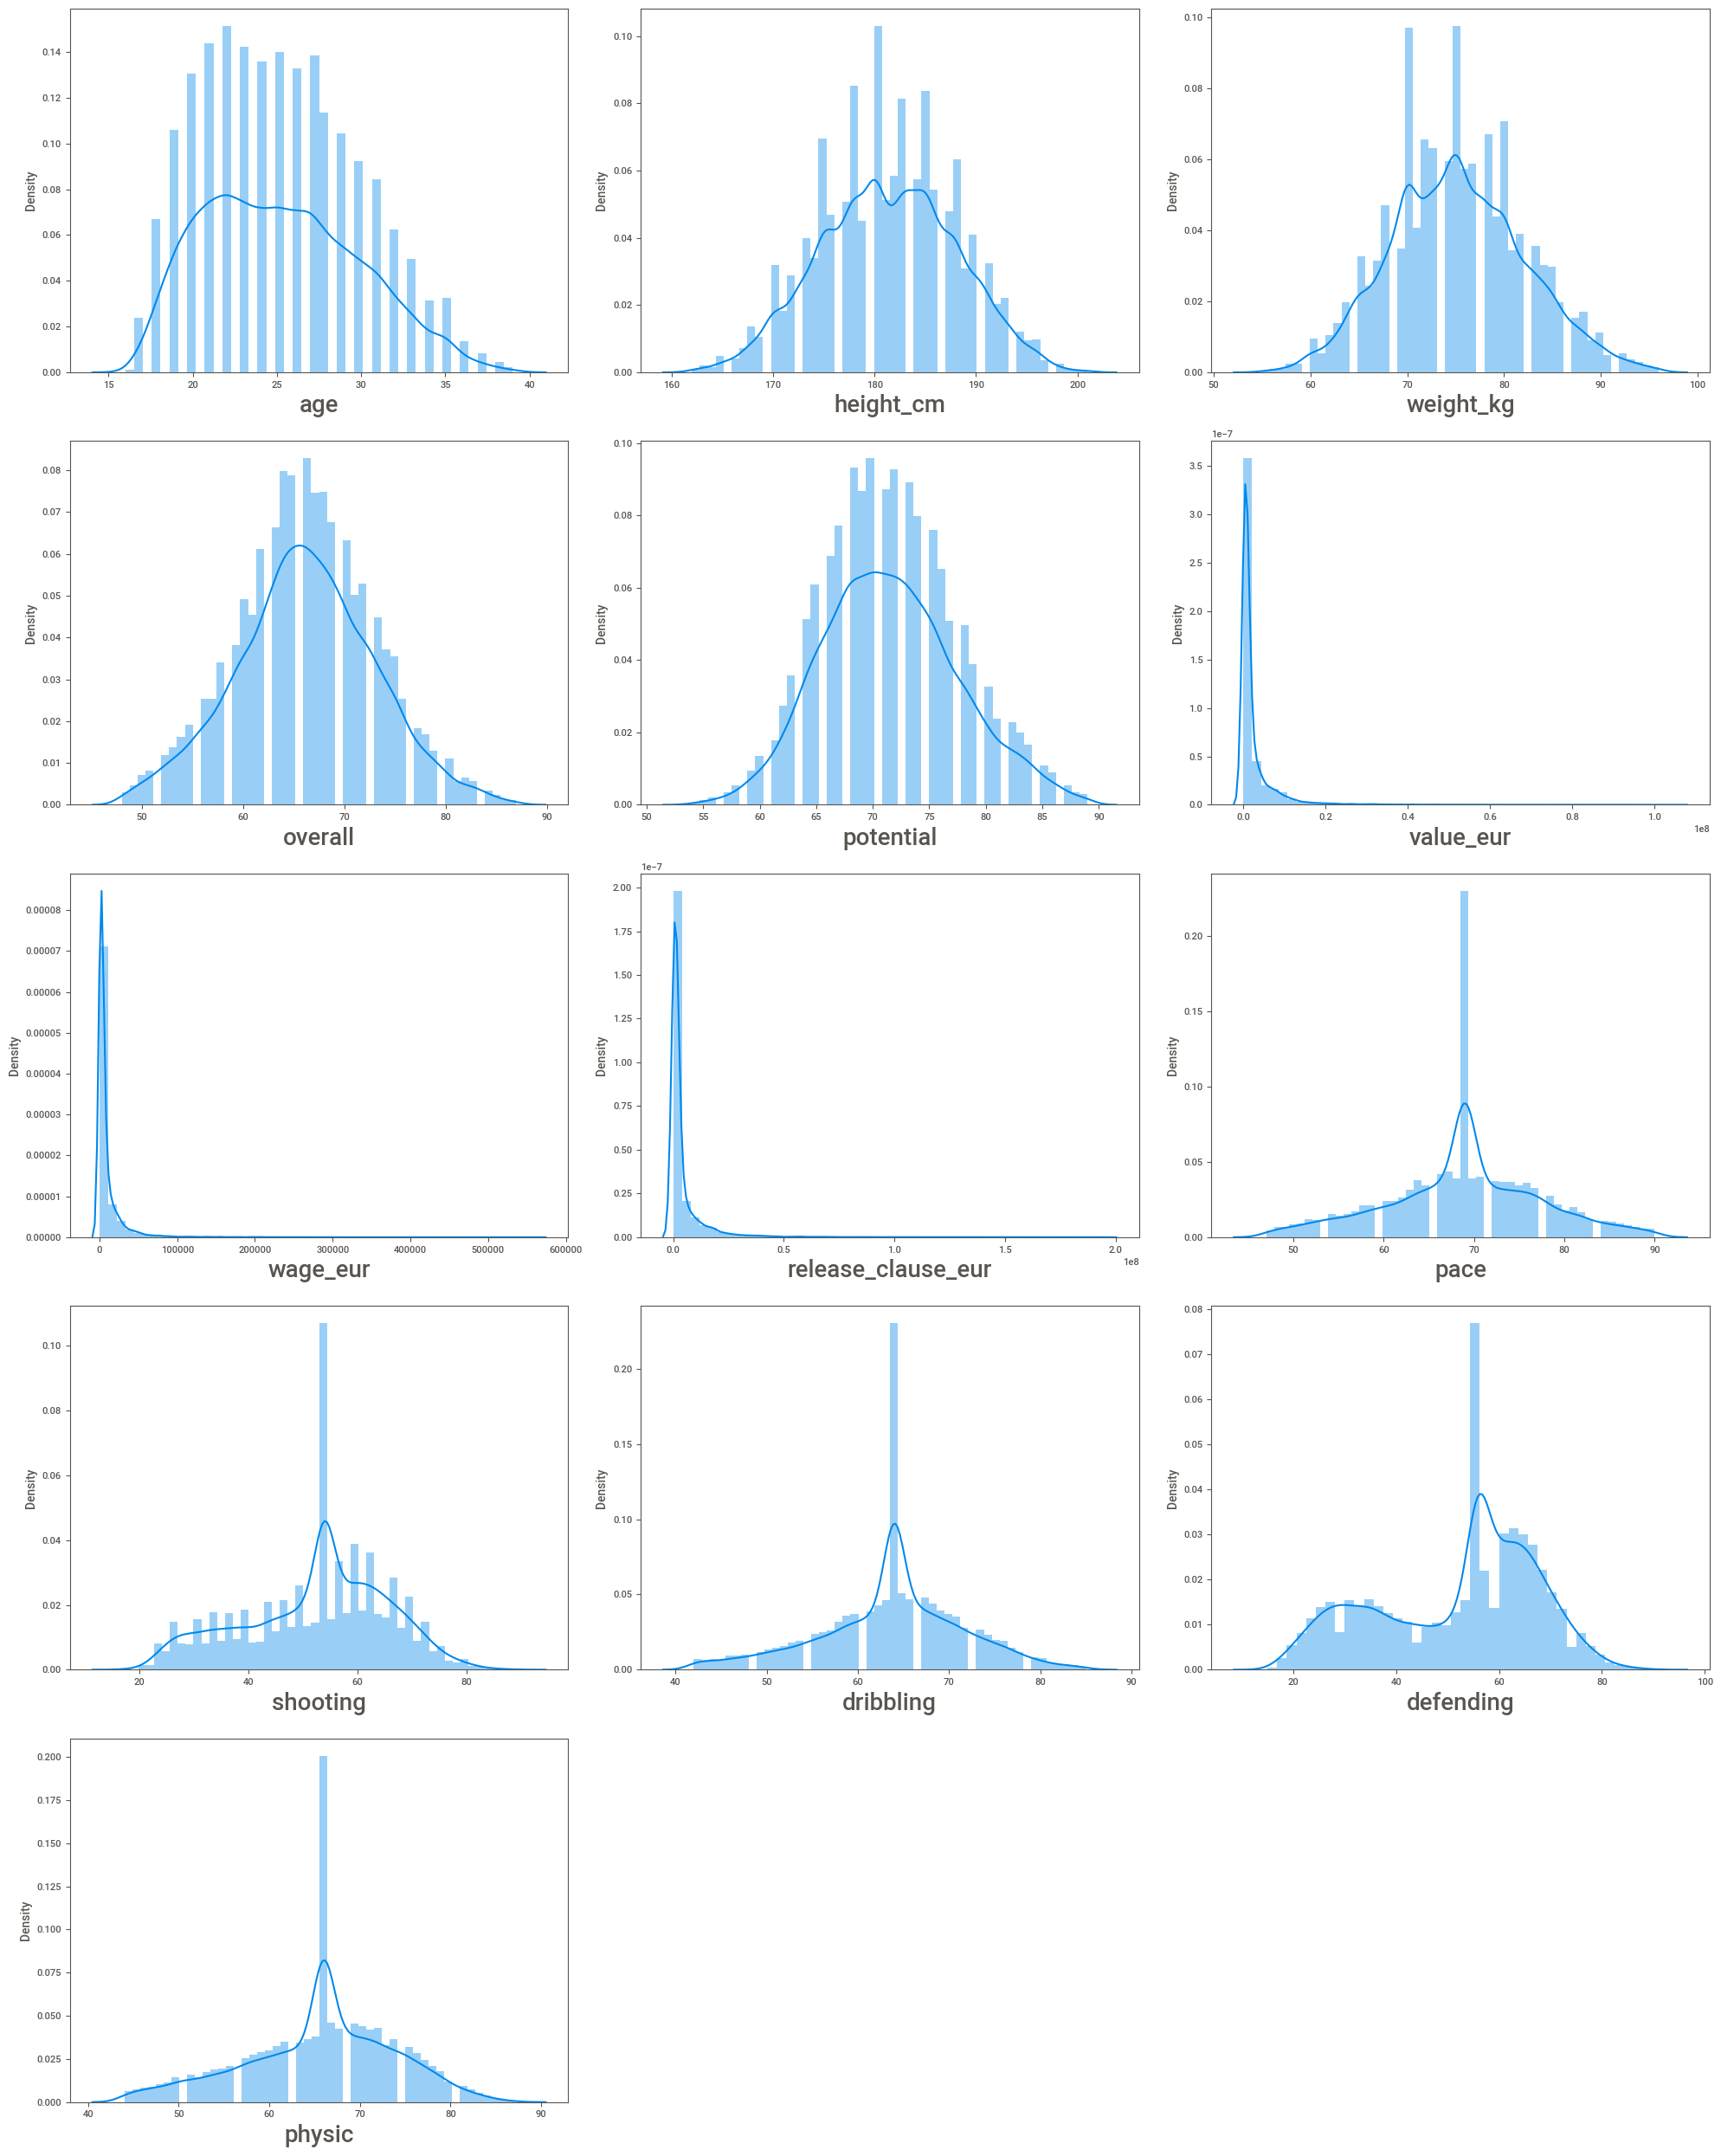

In [122]:
dist2 = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) 
plotnumber = 1

for column in dist2:  
    if plotnumber<=15:    
        plt.subplot(5,3,plotnumber) 
        sns.distplot(x=dist2[column]) 
        plt.xlabel(column,fontsize=20)  
    plotnumber+=1 
plt.tight_layout()
plt.show()

In [123]:
## Checking for duplicates:
data.duplicated().sum()

0

## Scaling:

### Min-Max Scaling:

- Scale the feature between 0 t0 1.
- Only scale the continous feature.
- Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [125]:
data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(data[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [126]:
data.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name       age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini  0.695652  1987-06-24   0.205128   0.414634   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona  0.46782    0.50134   0.905213       1.0   

  player_positions  preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST               0                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes                 1.0   

                                         player_tags  team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...              9   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number      pace  shooting  passing  \
0             NaN                   NaN  0.930233  0.513889      1.0   

   dribbling  defending    physic  gk_diving  gk_handling  gk_kicking  \
0   0.511628       0.32  0.511628        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  \
0          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...            0.943182   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                  1.0                    0.738636                      1.0   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0           0.977011              1.0     0.988636                1.0   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                 1.0                 1.0               0.929412   

   movement_sprint_speed  movement_agility  movement_reactions  \
0               0.858824          0.964706            0.986667   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0          0.976471          0.888889       0.644737       0.741176   

   power_strength  power_long_shots  mentality_aggression  \
0        0.623377               1.0              0.453488   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                  0.41573               0.989247               1.0   

   mentality_penalties  mentality_composure  defending_marking  \
0                  0.8                  1.0           0.344086   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                   0.367816                  0.264368             0.05618   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0               0.10989             0.152174                 0.144444   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  \
0              0.076923  89  89  89  93  93  93  93  93  93  93  93  92  87   

   cm rcm  rm lwb ldm cdm rdm rwb  lb lcb  cb rcb  rb  
0  87  87  92  68  66  66  66  68  63  52  52  52  63

## Feature Engineering/Feature Selection:

### 1.Drop the irrelevant column:

- Here we are going to drop unique column as well as lots of missing value column.
- The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only playes with the team position and we will drop this column

In [127]:
# Drop column
data.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

data.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782    0.50134   0.905213  1.000000   
1  0.782609   0.641026   0.682927  0.46782    0.50134   0.554502  0.716814   
2  0.478261   0.333333   0.317073  0.46782    0.50134   1.000000  0.513274   
3  0.434783   0.666667   0.780488  0.46782    0.50134   0.734597  0.221239   
4  0.521739   0.333333   0.463415  0.46782    0.50134   0.853081  0.831858   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0               0                         5          4            4   
1               1                         5          4            5   
2               1                         5          5            5   
3               1                         3          3            1   
4               1                         4          4            4   

   release_clause_eur  team_position      pace  shooting   passing  dribbling  \
0            1.000000              9  0.930233  0.513889  1.000000   0.511628   
1            0.492816             10  1.000000  0.513889  0.852941   0.511628   
2            0.996935             16  0.511628  0.944444  0.926471   0.511628   
3            0.841154             26  0.511628  0.513889  0.500000   0.511628   
4            0.942284             10  0.511628  0.916667  0.911765   0.511628   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.320000  0.511628            0.943182             1.000000   
1   0.266667  0.790698            0.897727             0.989247   
2   0.226667  0.325581            0.931818             0.913978   
3   0.546667  0.511628            0.090909             0.096774   
4   0.266667  0.511628            0.863636             0.881720   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   
3                    0.113636                 0.423529           0.114943   
4                    0.636364                 0.964706           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   
3            0.274725               0.364706               0.576471   
4            0.978022               0.964706               0.905882   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   
3       0.776316       0.341176        0.753247          0.088889   
4       0.486842       0.847059        0.558442          0.844444  

### 2.Checking correlation:

In [128]:
data.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081826   0.235509  0.465942   
height_cm                   0.081826   1.000000   0.758770  0.040680   
weight_kg                   0.235509   0.758770   1.000000  0.152620   
overall                     0.465942   0.040680   0.152620  1.000000   
potential                  -0.263496  -0.002577  -0.015065  0.627283   
value_eur                   0.083345   0.010298   0.049439  0.568768   
wage_eur                    0.152189   0.019600   0.063460  0.496974   
preferred_foot              0.006318   0.083466   0.076585 -0.035088   
international_reputation    0.256318   0.038448   0.089659  0.431482   
weak_foot                   0.073591  -0.173892  -0.126301  0.227064   
skill_moves                 0.048315  -0.427502  -0.347745  0.400131   
release_clause_eur          0.068669   0.011371   0.045490  0.539411   
team_position              -0.162284   0.115194   0.065832 -0.272091   
pace                       -0.066880  -0.322365  -0.271492  0.185569   
shooting                    0.223736  -0.166608  -0.073821  0.454310   
passing                     0.307117  -0.251702  -0.157101  0.627560   
dribbling                   0.142064  -0.302421  -0.217073  0.528696   
defending                   0.245411   0.226195   0.224705  0.303984   
physic                      0.377200   0.413395   0.488846  0.450878   
attacking_crossing          0.131539  -0.497227  -0.396936  0.389289   
attacking_finishing         0.081372  -0.374448  -0.288346  0.340242   
attacking_heading_accuracy  0.152823   0.011685   0.045244  0.347073   
attacking_short_passing     0.138928  -0.369698  -0.285845  0.500757   
attacking_volleys           0.145669  -0.349416  -0.257117  0.391496   
skill_dribbling             0.020140  -0.498800  -0.410891  0.370315   
skill_curve                 0.144337  -0.446247  -0.345106  0.414414   
skill_fk_accuracy           0.192761  -0.408897  -0.306785  0.387645   
skill_long_passing          0.186275  -0.333392  -0.256855  0.484578   
skill_ball_control          0.091374  -0.423452  -0.335102  0.455734   
movement_acceleration      -0.148783  -0.556171  -0.487734  0.184868   
movement_sprint_speed      -0.139705  -0.473234  -0.416656  0.197523   
movement_agility           -0.019365  -0.630699  -0.538694  0.251562   
movement_reactions          0.464196  -0.016994   0.089642  0.853851   
movement_balance           -0.087483  -0.787144  -0.662585  0.102954   
power_shot_power            0.263674  -0.172917  -0.055168  0.564511   
power_jumping               0.186651  -0.037792   0.036262  0.265549   
power_stamina               0.121348  -0.290375  -0.213385  0.370892   
power_strength              0.341898   0.532803   0.611371  0.361541   
power_long_shots            0.164369  -0.382525  -0.275918  0.424567   
mentality_aggression        0.262180  -0.044888   0.033688  0.402270   
mentality_interceptions     0.198394  -0.053658  -0.024550  0.318321   
mentality_positioning       0.089510  -0.444021  -0.351582  0.354784   
mentality_vision            0.196565  -0.369987  -0.279618  0.503976   
mentality_penalties         0.143095  -0.333835  -0.242049  0.344874   
mentality_composure         0.370790  -0.157882  -0.053070  0.713519   
defending_marking           0.159563  -0.076984  -0.045115  0.305655   
defending_standing_tackle   0.119566  -0.068868  -0.048719  0.253197   
defending_sliding_tackle    0.104168  -0.077487  -0.060498  0.223361   
goalkeeping_diving          0.107007   0.366298   0.334619 -0.017887   
goalkeeping_handling        0.109208   0.366080   0.336499 -0.018431   
goalkeeping_kicking         0.108890   0.363583   0.332997 -0.022055   
goalkeeping_positioning     0.117237   0.365898   0.337138 -0.011307   
goalkeeping_reflexes        0.108485   0.366145   0.335983 -0.017552   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.263496   0.083345  0.152189        

### Heatmap for better visualization:

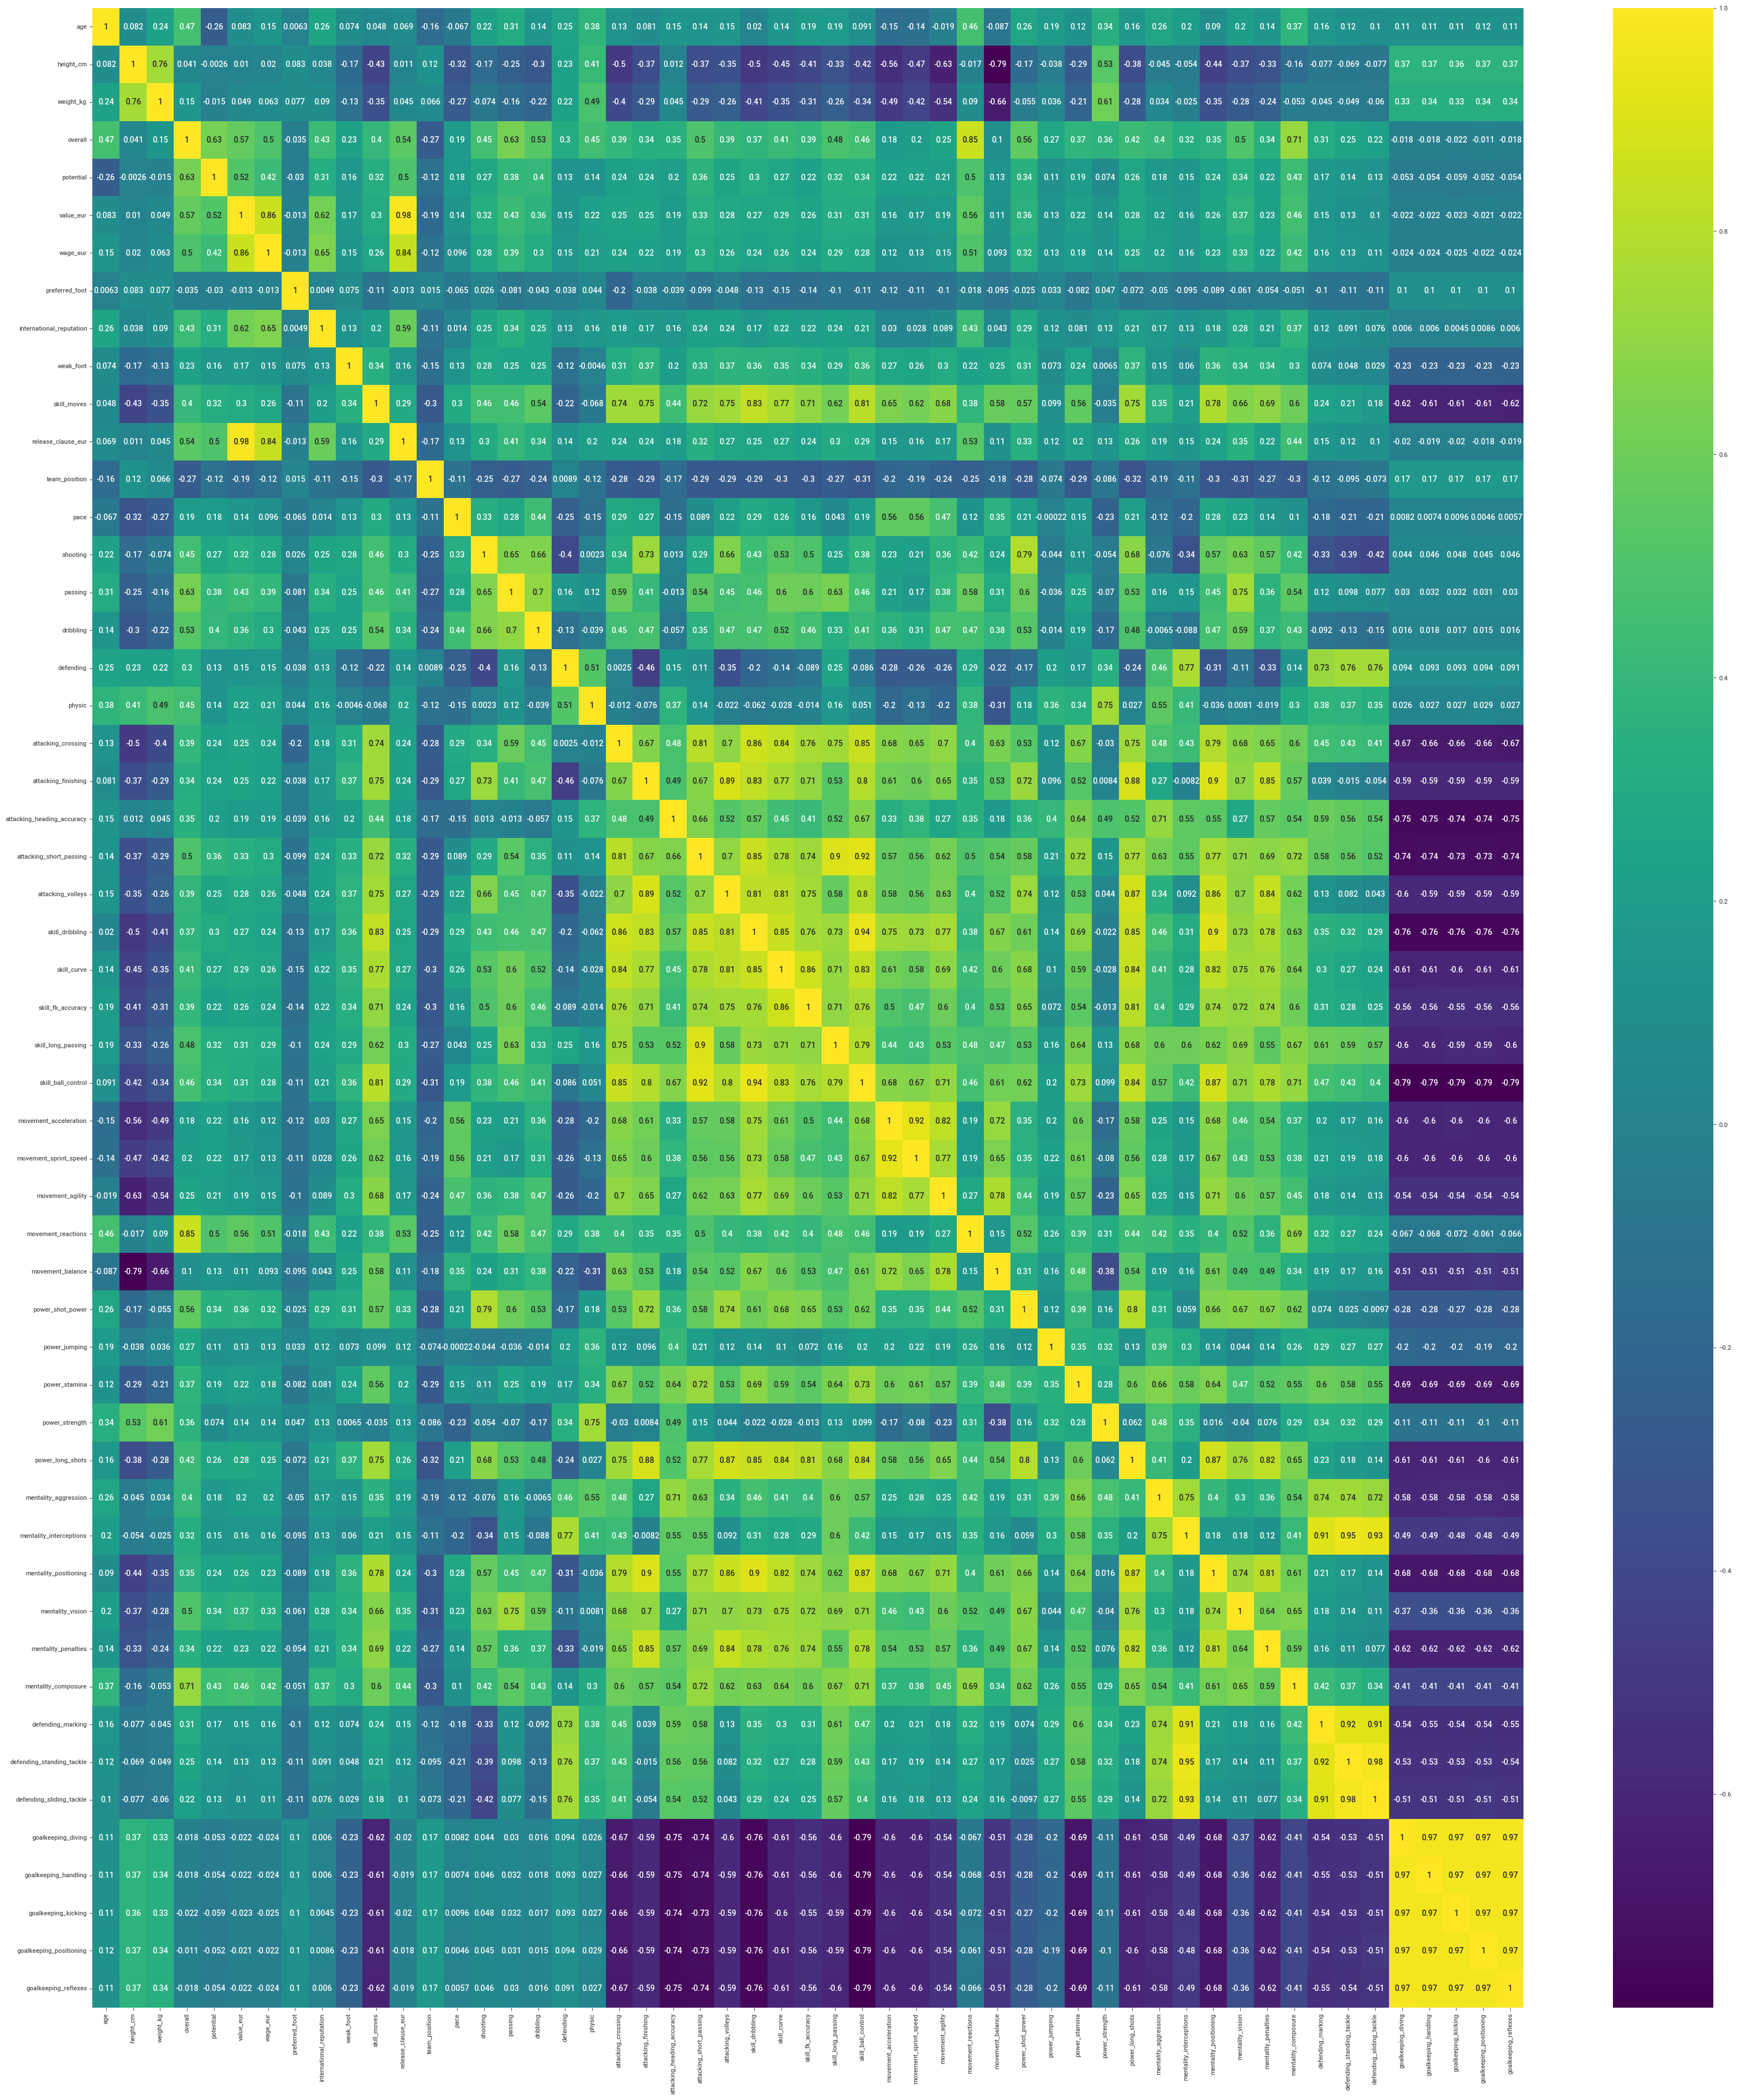

In [129]:
plt.figure(figsize=(40,45))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

- From the above heatmap is very difficult to find highly correalted feature so we are create a python code to check the highly corelated feature

In [130]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0          release_clause_eur                  value_eur  0.979233
1                   value_eur         release_clause_eur  0.979233
2    defending_sliding_tackle  defending_standing_tackle  0.975808
3   defending_standing_tackle   defending_sliding_tackle  0.975808
4          goalkeeping_diving       goalkeeping_reflexes  0.973922
5        goalkeeping_reflexes         goalkeeping_diving  0.973922
6        goalkeeping_handling         goalkeeping_diving  0.971330
7          goalkeeping_diving       goalkeeping_handling  0.971330
8        goalkeeping_reflexes       goalkeeping_handling  0.971244
9        goalkeeping_handling       goalkeeping_reflexes  0.971244
10         goalkeeping_diving    goalkeeping_positioning  0.971218
11    goalkeeping_positioning         goalkeeping_diving  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14       goalkeeping_handling    goalkeeping_positioning  0.970517
15    goalkeeping_positioning       goalkeeping_handling  0.970517
16       goalkeeping_reflexes        goalkeeping_kicking  0.967866
17        goalkeeping_kicking       goalkeeping_reflexes  0.967866
18         goalkeeping_diving        goalkeeping_kicking  0.967057
19        goalkeeping_kicking         goalkeeping_diving  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22    goalkeeping_positioning        goalkeeping_kicking  0.966061
23        goalkeeping_kicking    goalkeeping_positioning  0.966061
24  defending_standing_tackle    mentality_interceptions  0.945287
25    mentality_interceptions  defending_standing_tackle  0.945287
26         skill_ball_control            skill_dribbling  0.943461
27            skill_dribbling         skill_ball_control  0.943461
28    mentality_interceptions   defending_sliding_tackle  0.933894
29   defending_sliding_tackle    mentality_interceptions  0.933894
30      movement_sprint_speed      movement_acceleration  0.923721
31      movement_acceleration      movement_sprint_speed  0.923721
32  defending_standing_tackle          defending_marking  0.918593
33          defending_marking  defending_standing_tackle  0.918593
34         skill_ball_control    attacking_short_passing  0.917721
35    attacking_short_passing         skill_ball_control  0.917721
36   defending_sliding_tackle          defending_marking  0.909153
37          defending_marking   defending_sliding_tackle  0.909153
38    mentality_interceptions          defending_marking  0.907401
39          defending_marking    mentality_interceptions  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

#### Drop Highly Coorelated features:

In [131]:
data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

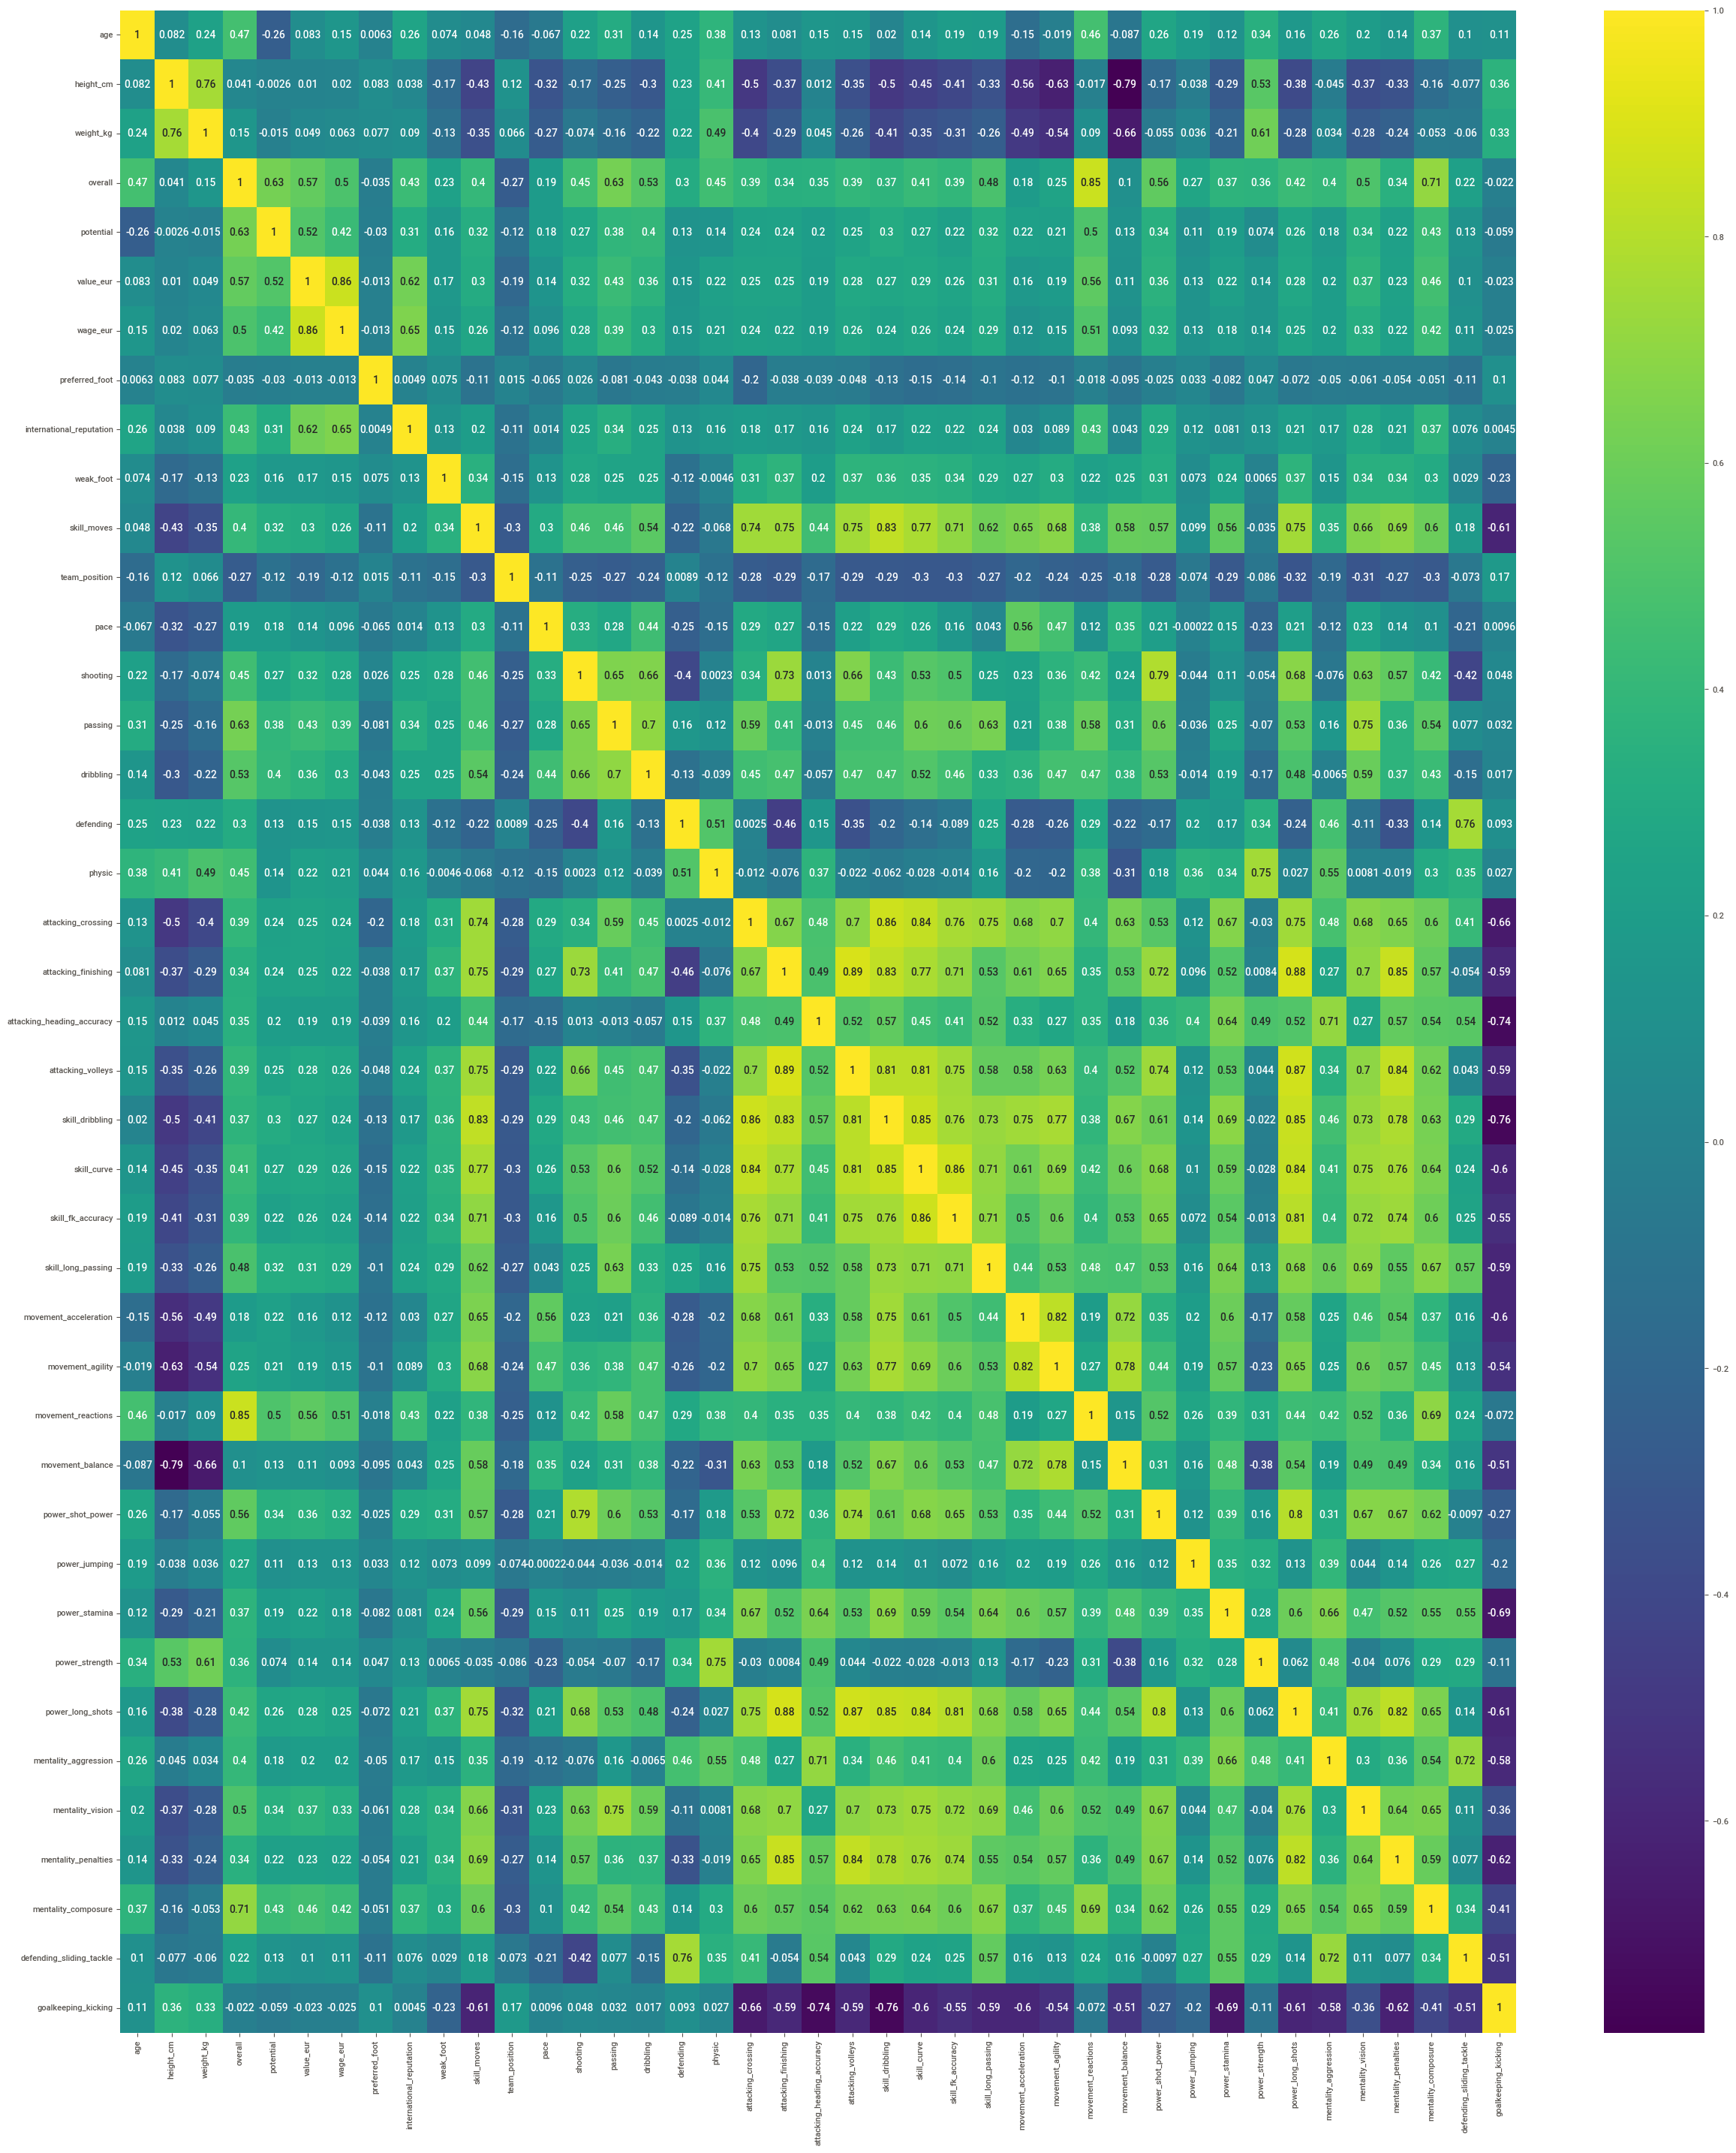

In [132]:
plt.figure(figsize=(30,35))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

# Model Building/Model Creation:

## PCA Priciple Component Analysis:

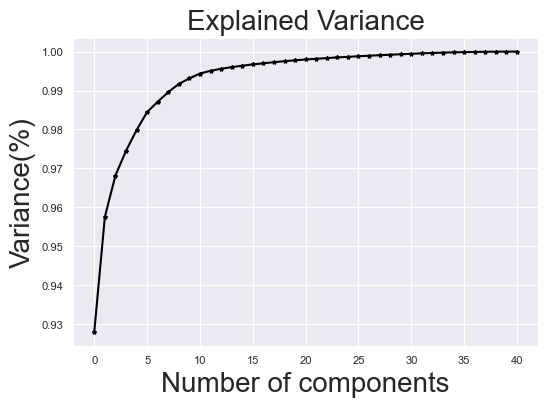

In [133]:
from sklearn.decomposition import PCA
pca = PCA() # Object creation
principlecomponents = pca.fit_transform(data) # Fitting the data
plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

- Here we are select 10 components because less varaince loss

In [134]:
# Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(data)

# Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.461011  2.008630  0.122989  1.421662  0.401489  2.698452  1.526569   
1 -14.498020  2.568569  0.090159  1.619623  1.411550  2.108033  1.480634   
2  -8.528254  3.401321  0.930085  1.132852  1.232112  2.268347  1.852304   
3   1.789533 -1.352102  0.824680  0.993964  0.733495  1.632658  0.781963   
4 -14.445012  1.819809  0.365571  0.915319  1.050993  1.710281  1.116505   

       pca8      pca9     pca10  
0 -0.589765  1.391919  0.047190  
1  0.334860  1.449203  0.270779  
2 -0.021711  1.413278 -0.244428  
3 -0.220696  0.230974  0.253644  
4 -0.382024  1.115458 -0.080504

## K-Means Clustering:

### Model creation:

- Create a cluster on data
- Get best sillhoutte score, range of sillhoutte score between -1 to +1

In [135]:
# Define the independent variable
X = principle_df
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.461011  2.008630  0.122989  1.421662  0.401489  2.698452  1.526569   
1 -14.498020  2.568569  0.090159  1.619623  1.411550  2.108033  1.480634   
2  -8.528254  3.401321  0.930085  1.132852  1.232112  2.268347  1.852304   
3   1.789533 -1.352102  0.824680  0.993964  0.733495  1.632658  0.781963   
4 -14.445012  1.819809  0.365571  0.915319  1.050993  1.710281  1.116505   

       pca8      pca9     pca10  
0 -0.589765  1.391919  0.047190  
1  0.334860  1.449203  0.270779  
2 -0.021711  1.413278 -0.244428  
3 -0.220696  0.230974  0.253644  
4 -0.382024  1.115458 -0.080504

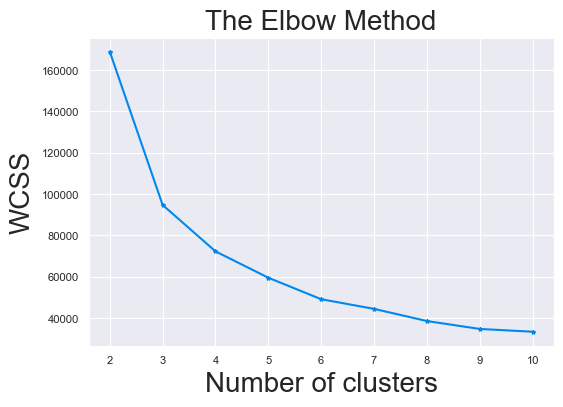

In [136]:
# Initalize the K value
from sklearn.cluster import KMeans
kmeans = KMeans() 
wcss = [] 

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

- From above plot we are select 3 cluster because of odd no and more variance

In [148]:
# initalize the cluster
kmeans = KMeans(n_clusters=3,random_state=45)

# Fitting the data
kmeans.fit(X)

# Get labels
kmeans.labels_

# Print dataset with labels
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.461011  2.008630  0.122989  1.421662  0.401489  2.698452  1.526569   
1 -14.498020  2.568569  0.090159  1.619623  1.411550  2.108033  1.480634   
2  -8.528254  3.401321  0.930085  1.132852  1.232112  2.268347  1.852304   
3   1.789533 -1.352102  0.824680  0.993964  0.733495  1.632658  0.781963   
4 -14.445012  1.819809  0.365571  0.915319  1.050993  1.710281  1.116505   

       pca8      pca9     pca10  cluster  
0 -0.589765  1.391919  0.047190        1  
1  0.334860  1.449203  0.270779        1  
2 -0.021711  1.413278 -0.244428        1  
3 -0.220696  0.230974  0.253644        0  
4 -0.382024  1.115458 -0.080504        1

In [149]:
# initalize the centroids
kmeans.cluster_centers_

array([[ 3.34769330e+00, -2.67389533e-02,  1.27425196e-02,
        -6.36965864e-02,  2.01570951e-02,  3.29052291e-02,
         1.38660230e-03, -9.57448999e-04,  3.60352704e-03,
        -5.59912474e-03,  9.13229505e-01],
       [-1.18481040e+01, -4.01193676e-03,  9.77440621e-03,
        -8.12235530e-02,  3.33876287e-02,  2.13115697e-02,
        -2.57254077e-03,  7.76683919e-03,  1.57183167e-02,
        -1.24322494e-02,  2.56070996e+00],
       [-2.37045807e+00,  7.83897397e-02, -4.20957543e-02,
         2.29932287e-01, -7.73945404e-02, -1.06336467e-01,
        -2.38913347e-03, -1.96091548e-03, -1.97122597e-02,
         2.34016333e-02,  1.87089716e+00]])

# ModelEvaluation:

#### Silhouette Score:

- silhouette score range(-1 to +1)
- +1 ---> Samples are very far from cluster
- 0 ---> Samples close to decision boundary
- -1 ---> Samples are assign to wrong cluster

In [150]:
# Create a new variable assign to labels
labels = kmeans.labels_
labels

# import library to evaluate the model
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.574240447689915


- 3 Cluster silhouette score is 0.5742

In [152]:
# initalize the cluster
kmeans = KMeans(n_clusters=5,random_state=45)

# Fitting the data
kmeans.fit(X)

# Get labels
kmeans.labels_

# Print dataset with labels
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -15.461011  2.008630  0.122989  1.421662  0.401489  2.698452  1.526569   
1 -14.498020  2.568569  0.090159  1.619623  1.411550  2.108033  1.480634   
2  -8.528254  3.401321  0.930085  1.132852  1.232112  2.268347  1.852304   
3   1.789533 -1.352102  0.824680  0.993964  0.733495  1.632658  0.781963   
4 -14.445012  1.819809  0.365571  0.915319  1.050993  1.710281  1.116505   

       pca8      pca9     pca10  cluster  
0 -0.589765  1.391919  0.047190        1  
1  0.334860  1.449203  0.270779        1  
2 -0.021711  1.413278 -0.244428        3  
3 -0.220696  0.230974  0.253644        0  
4 -0.382024  1.115458 -0.080504        1

In [153]:
kmeans.cluster_centers_

array([[ 3.34909324e+00, -2.73635103e-02,  1.26253076e-02,
        -6.43816305e-02,  1.99490064e-02,  3.27026432e-02,
         1.16410561e-03, -9.54483240e-04,  3.58419898e-03,
        -5.60591192e-03,  3.46389584e-14],
       [-1.55009559e+01, -3.16364551e-01,  2.22662258e-02,
        -7.51560620e-02,  3.22498442e-02,  2.36571350e-02,
         3.23287443e-02,  3.33918769e-02,  6.94237487e-02,
         2.19284882e-02,  1.00000000e+00],
       [-4.77874565e+00,  4.39058623e-01,  3.84032212e-02,
        -6.43286616e-03,  1.03091144e-01,  2.57562267e-02,
        -1.10122371e-01, -2.66410606e-02,  6.21360729e-03,
        -4.72531817e-03,  2.00000000e+00],
       [-8.98626533e+00,  2.40701730e-01, -1.23502515e-05,
        -8.59771485e-02,  3.42790296e-02,  1.94739289e-02,
        -2.99160655e-02, -1.23091796e-02, -2.63573779e-02,
        -3.93522805e-02,  1.00000000e+00],
       [-7.04250322e-01, -1.67309182e-01, -9.68477892e-02,
         3.95300471e-01, -2.00477838e-01, -1.96010133e-01,
  

In [155]:
labels = kmeans.labels_
labels


from sklearn.metrics import silhouette_score
silhou_score_5 = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score_5)

Silhouette Score: 0.5801464098498871


- 5 Cluster silhouette score is 0.5801

## Conclusion:
- 3 Cluster silhouette score is 0.5742
- 5 Cluster silhouette score is 0.5801
- From the above we select 5 cluster because of Higher silhouette score.

### Cluster:

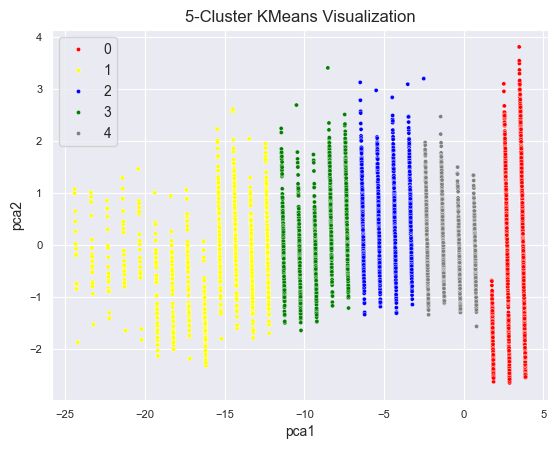

In [156]:
color = np.array(['red', 'yellow', 'blue','green','grey'])

sns.scatterplot(
    x=principle_df.pca1,
    y=principle_df.pca2,
    hue=kmeans.labels_,
    palette=color
)
plt.title("5-Cluster KMeans Visualization")
plt.show()

## Problems we have faced:

#### High Dimensionality :

- Too many features made clustering difficult; needed PCA to reduce dimensions.

#### Cluster Confusion :

- The silhouette score has been varying for each run so we had some difficulties to choose number of clusters.

#### Duplicate Features :

- Same column (attacking_crossing) repeated, affecting model quality.

#### Interpretability :

- PCA components were hard to interpret in terms of original features.

#### Model Evaluation :
    
- Had to rely on silhouette scores to judge clustering quality, no ground truth.
